In [ ]:
%matplotlib inline
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel,delayed
from joblib import delayed,Parallel
from scipy import signal
import shutil
import math
from sklearn.preprocessing import RobustScaler
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as pat
from sklearn.preprocessing import RobustScaler
from scipy import signal
from scipy.stats import skew,kurtosis
import numpy as np
from scipy import signal
from scipy.stats import iqr
import pickle


In [ ]:
ppg_window_col,ecg_window_col = pickle.load(open('/data/azim/window_ecg_ppg.p','rb'))

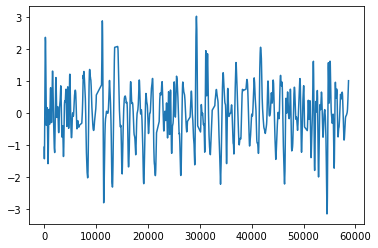

0


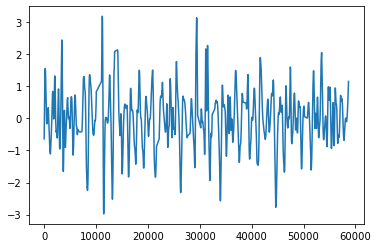

1


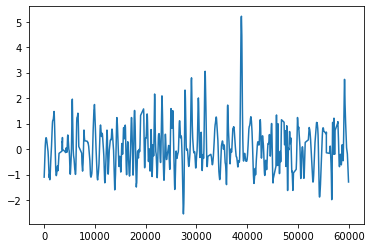

0


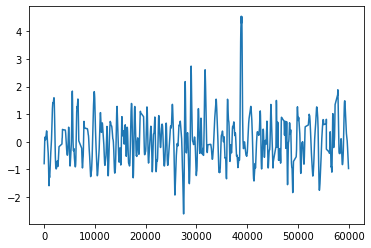

1


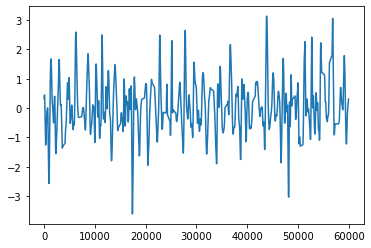

0


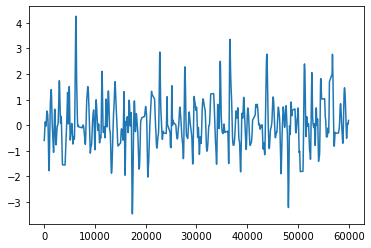

1


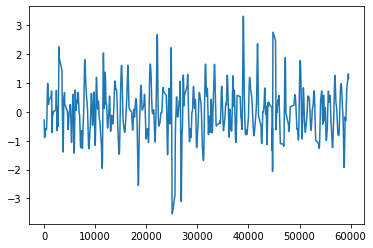

0


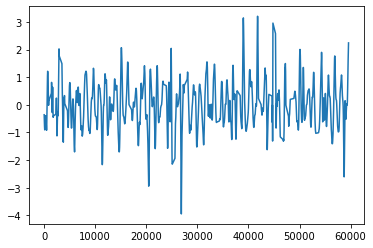

1


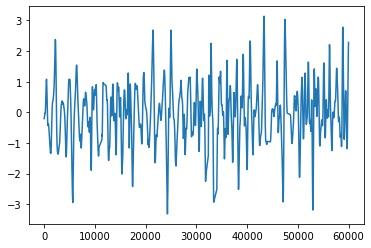

0


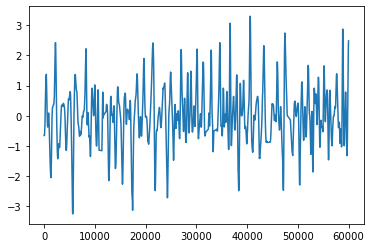

1


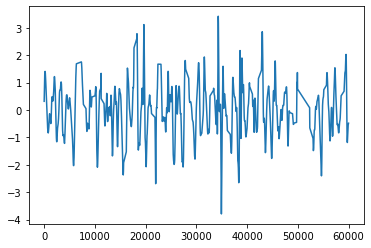

0


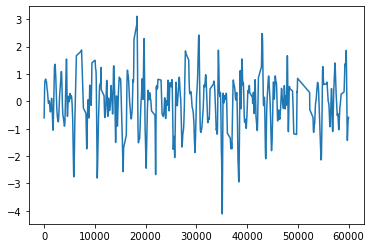

1


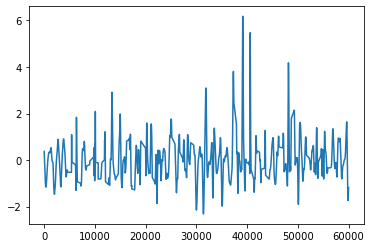

0


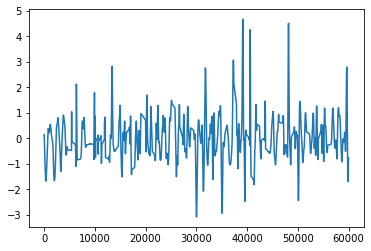

1


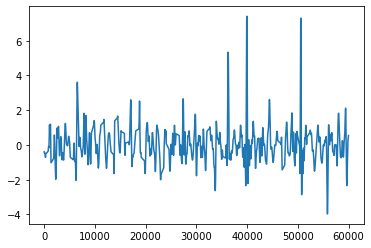

0


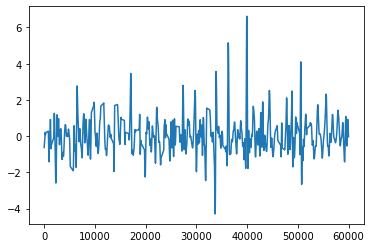

1


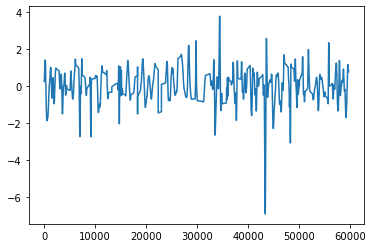

0


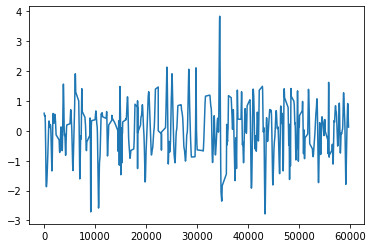

1


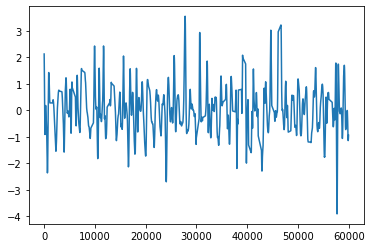

0


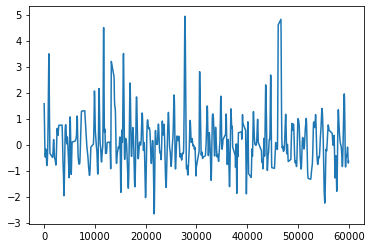

1


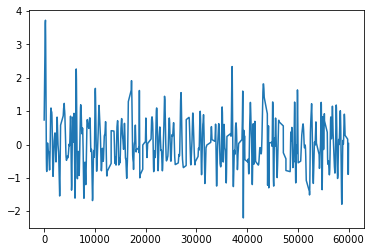

0


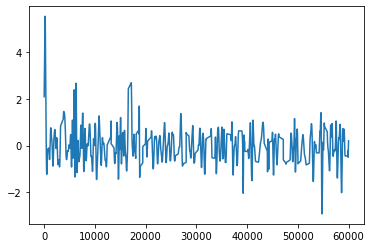

1


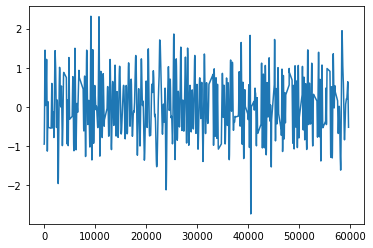

0


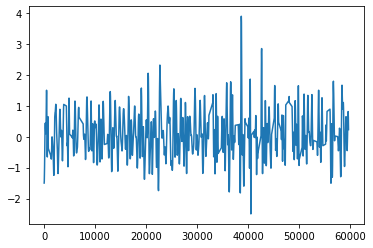

1


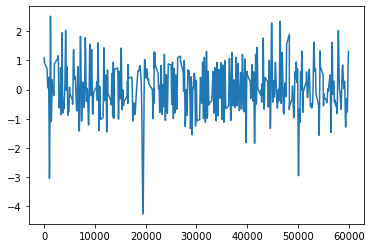

0


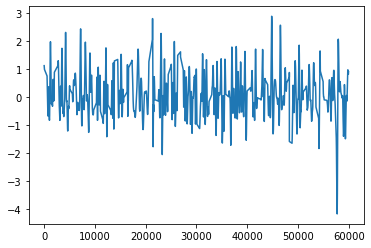

1


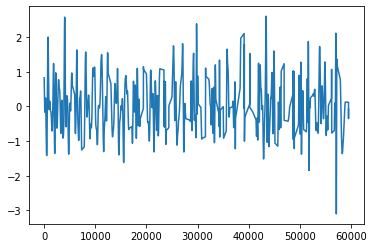

0


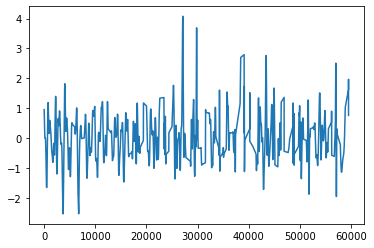

1


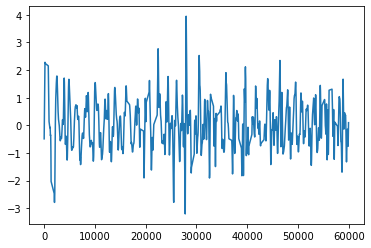

0


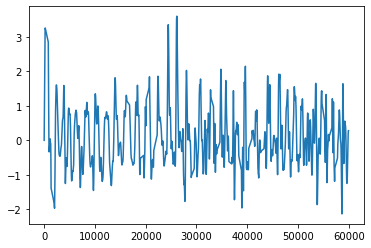

1


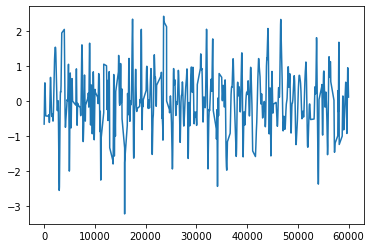

0


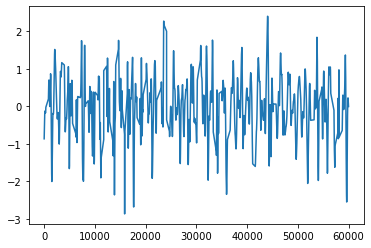

1


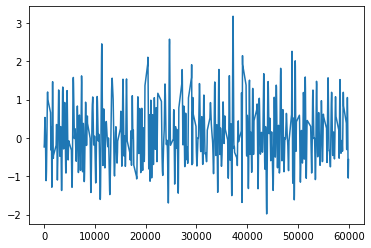

0


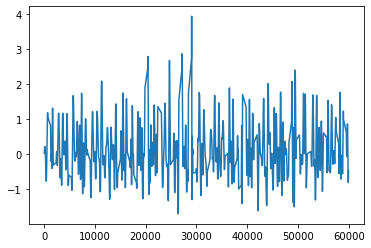

1


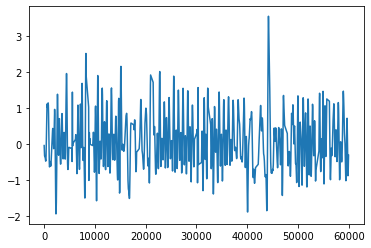

0


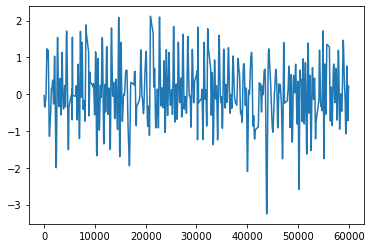

1


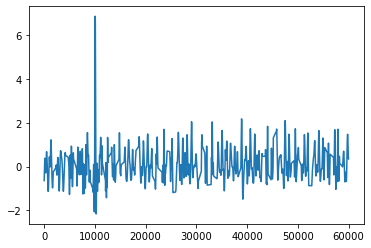

0


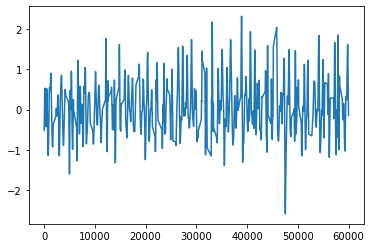

1


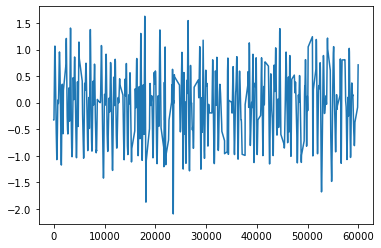

0


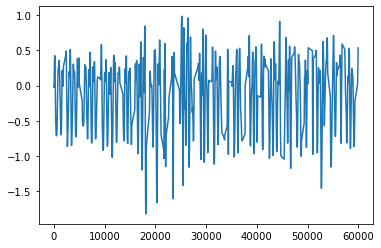

1


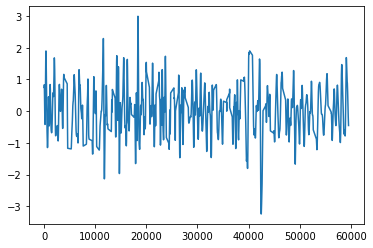

0


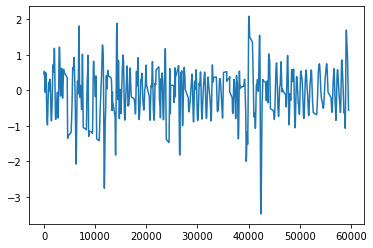

1


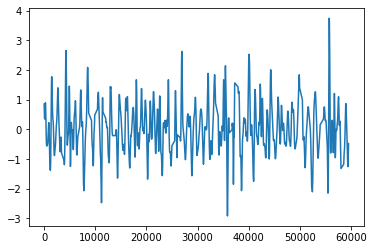

0


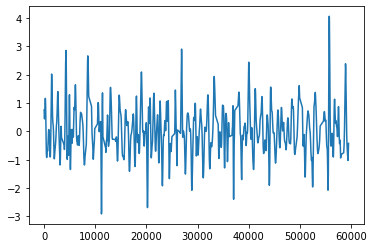

1


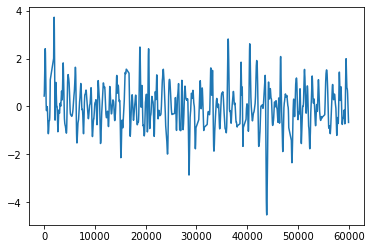

0


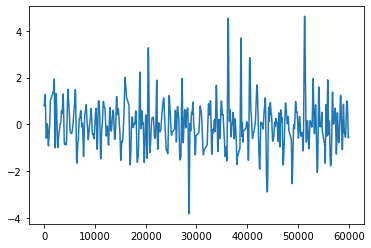

1


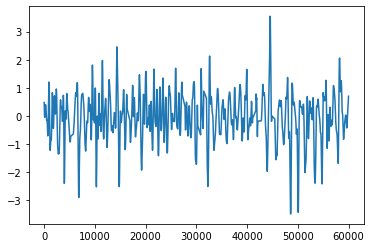

0


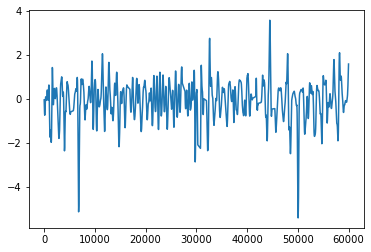

1


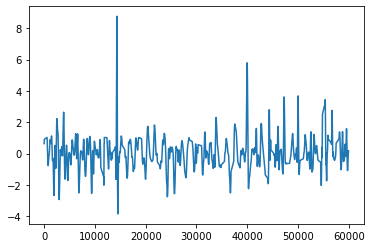

0


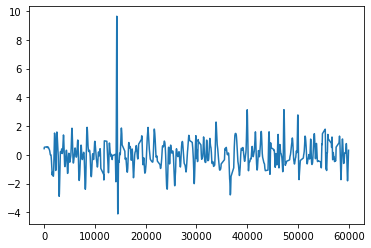

1


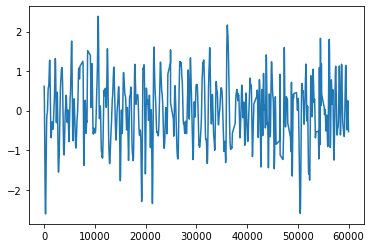

0


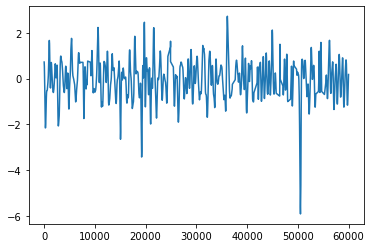

1


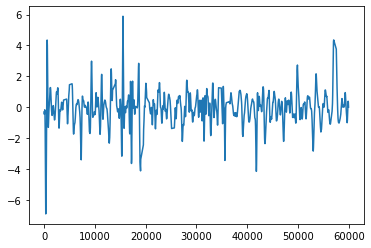

0


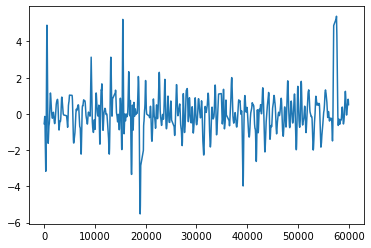

1


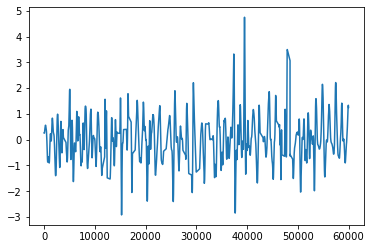

0


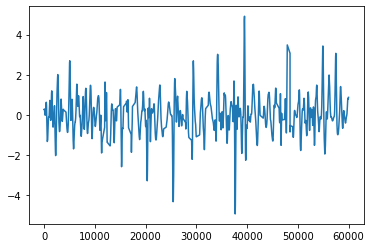

1


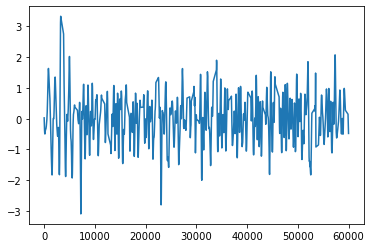

0


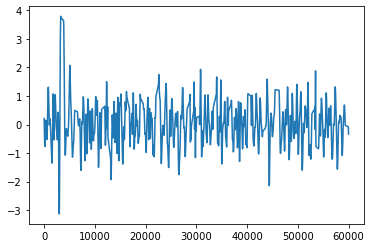

1


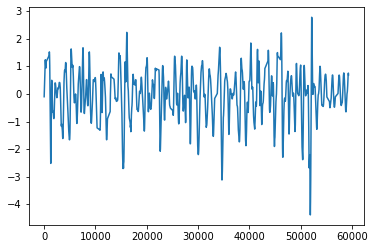

0


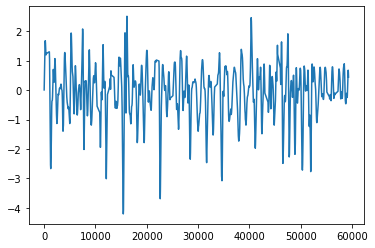

1


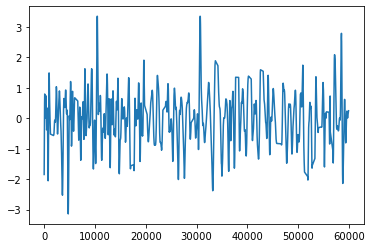

0


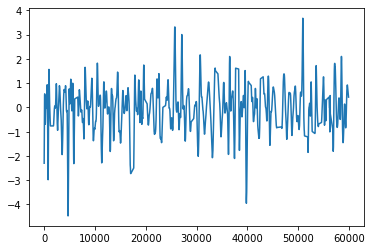

1


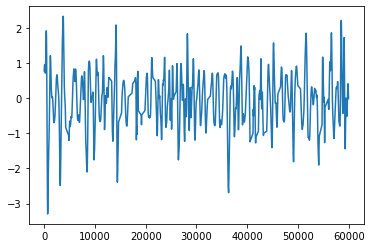

0


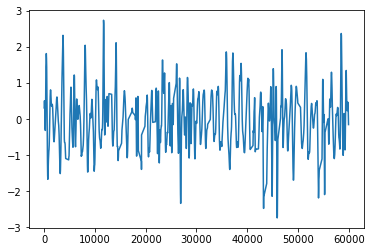

1


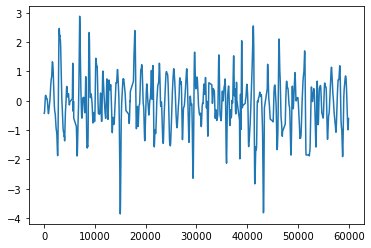

0


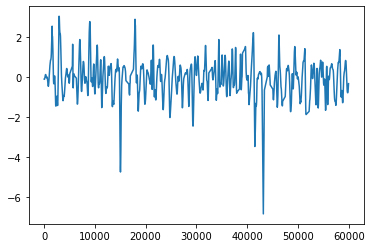

1


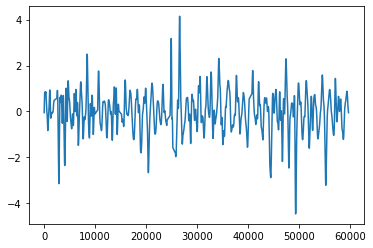

0


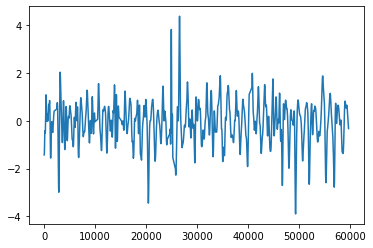

1


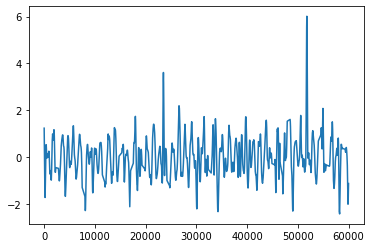

0


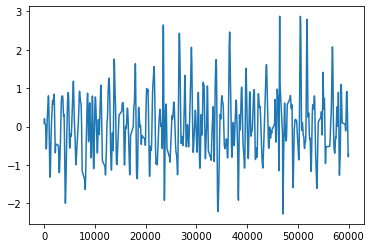

1


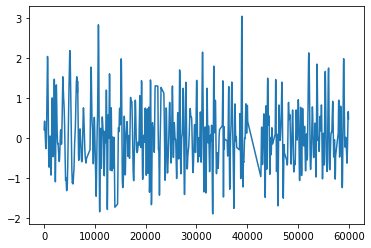

0


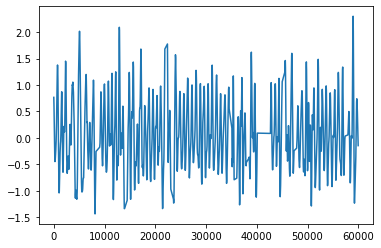

1


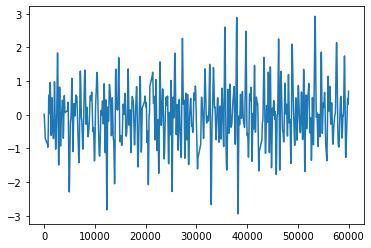

0


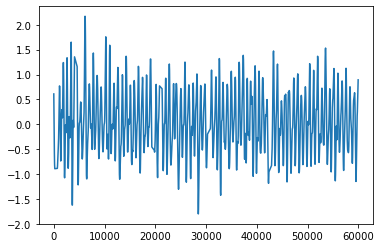

1


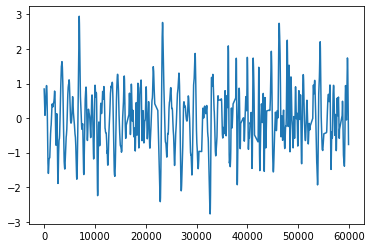

0


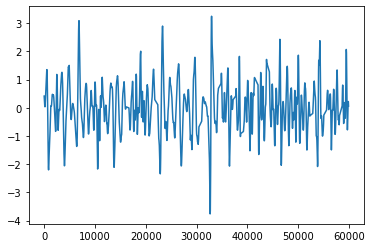

1


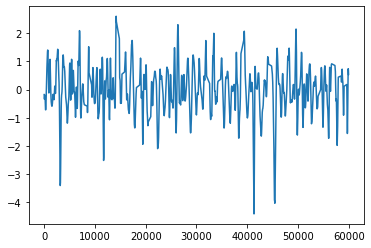

0


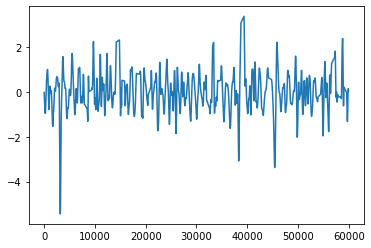

1


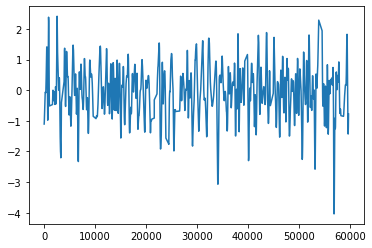

0


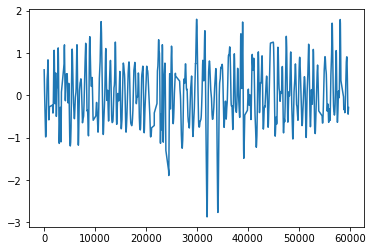

1


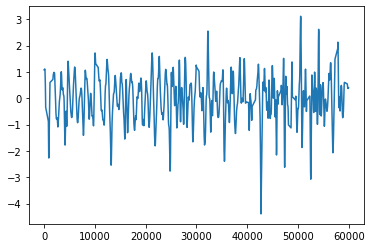

0


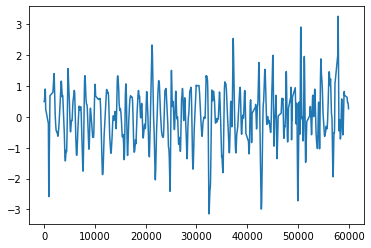

1


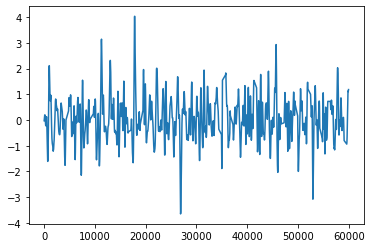

0


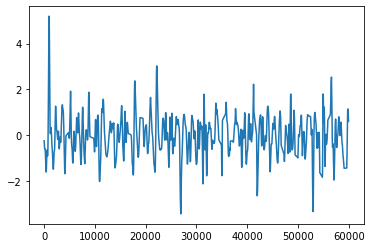

1


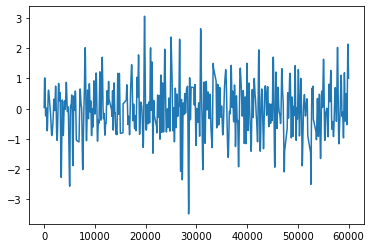

0


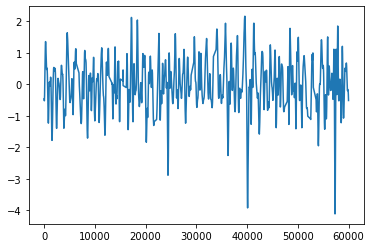

1


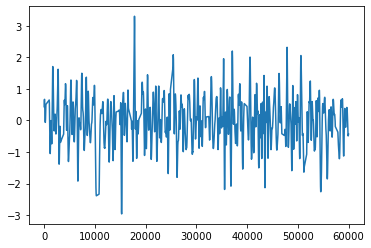

0


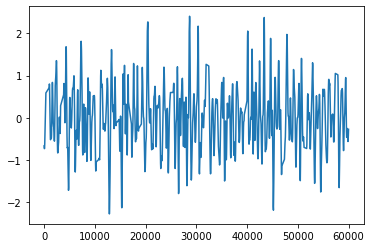

1


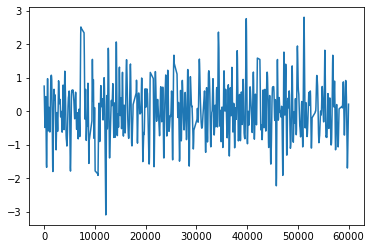

0


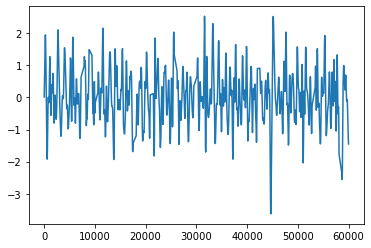

1


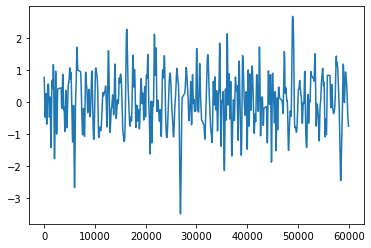

0


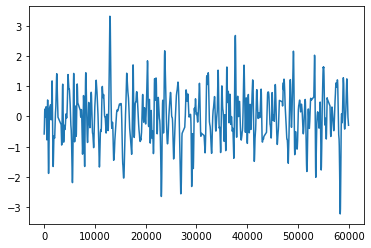

1


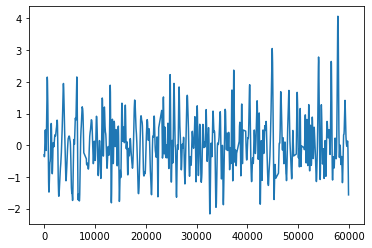

0


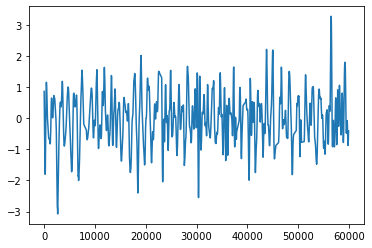

1


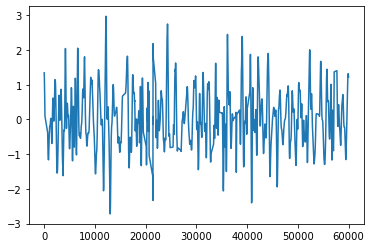

0


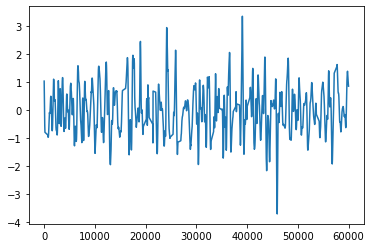

1


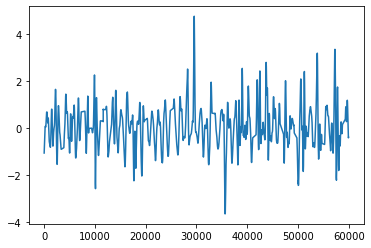

0


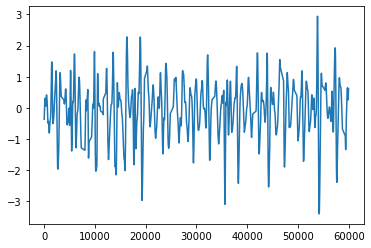

1


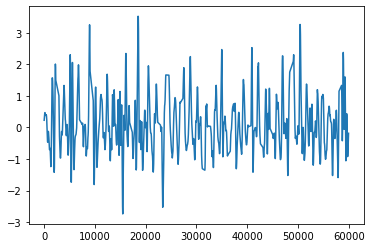

0


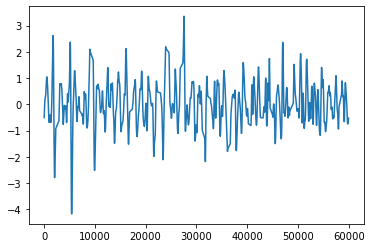

1


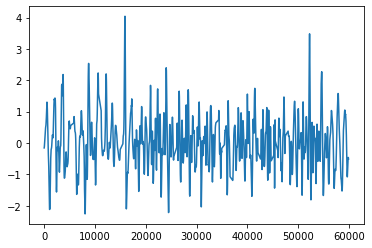

0


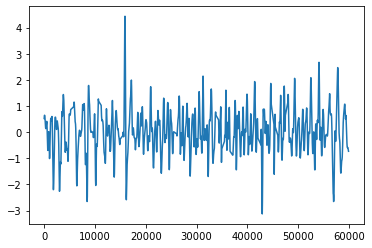

1


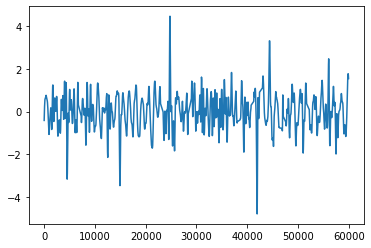

0


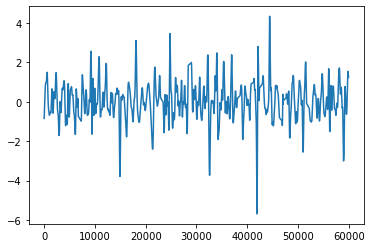

1


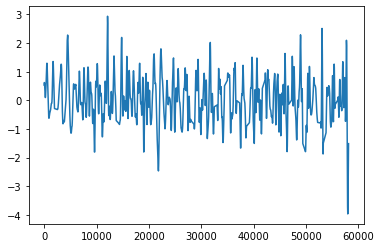

0


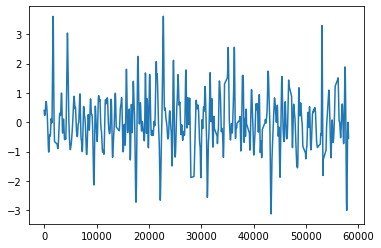

1


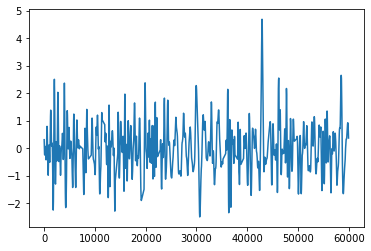

0


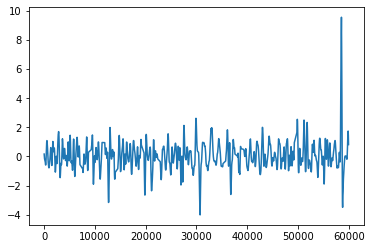

1


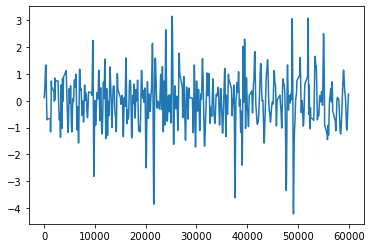

0


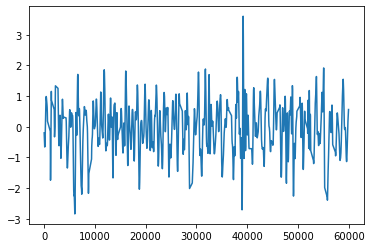

1


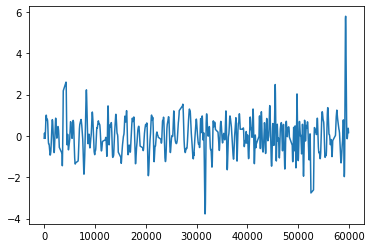

0


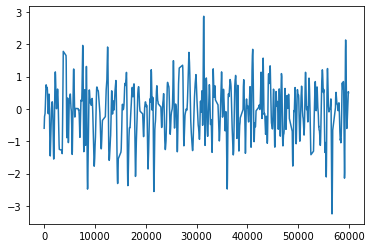

1


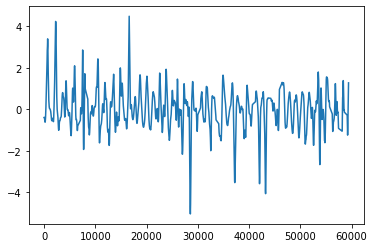

0


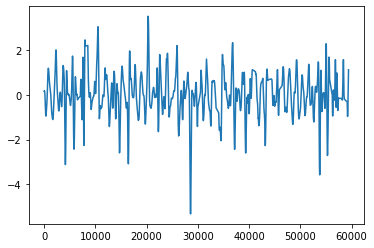

1


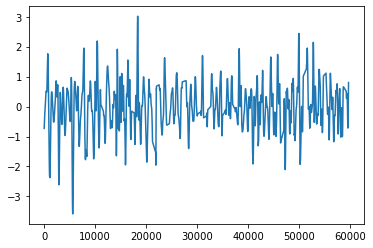

0


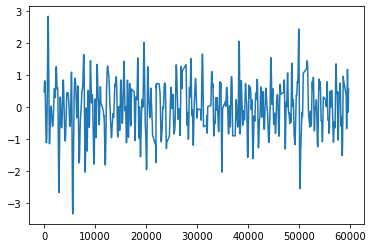

1


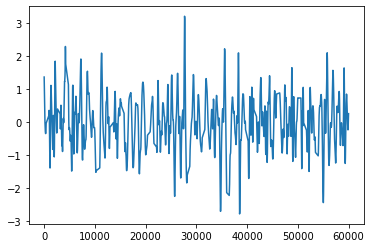

0


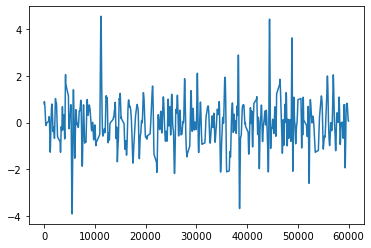

1


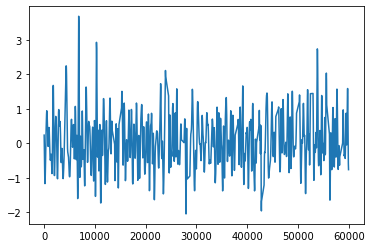

0


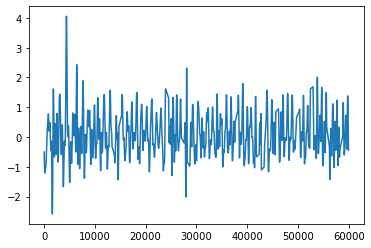

1


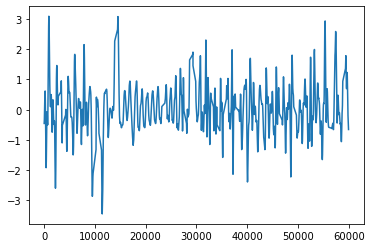

0


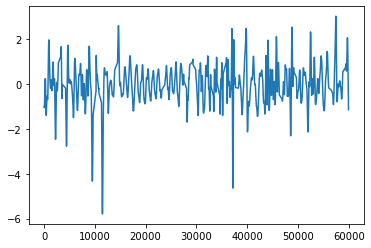

1


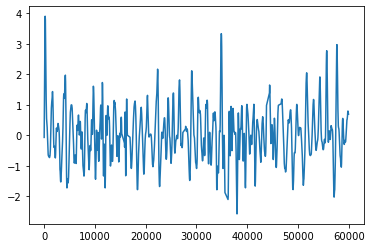

0


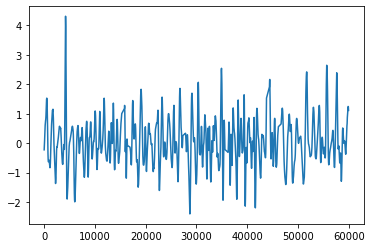

1


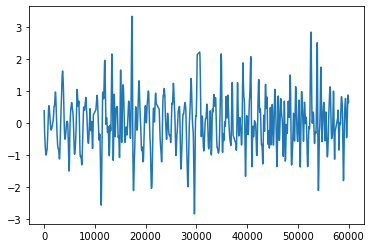

0


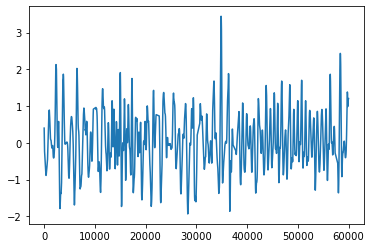

1


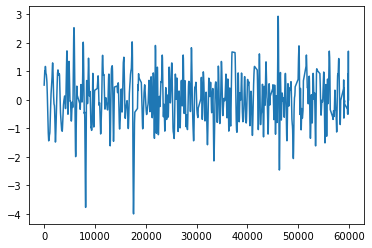

0


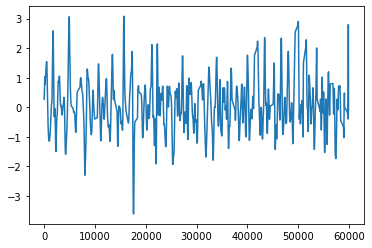

1


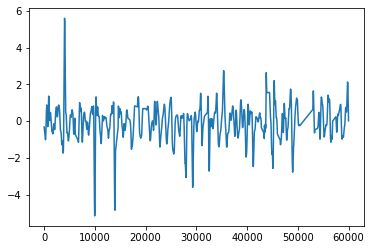

0


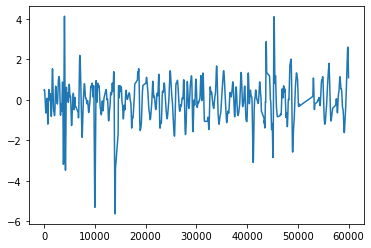

1


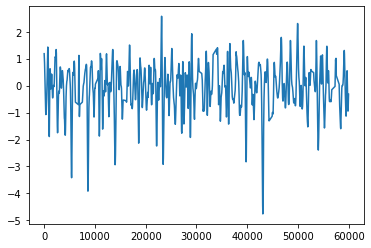

0


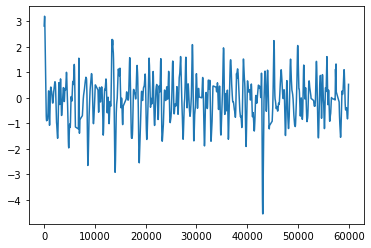

1


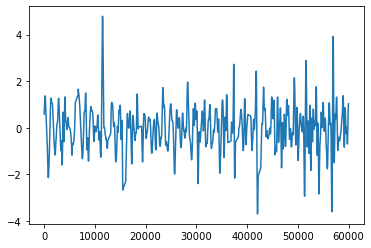

0


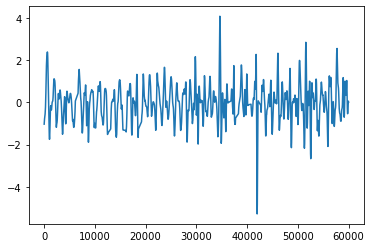

1


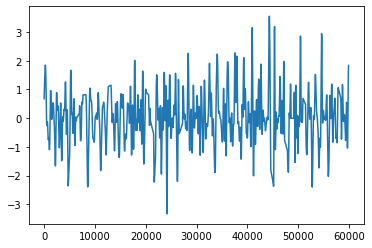

0


1


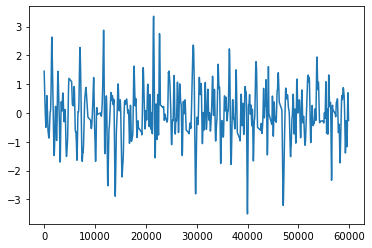

0


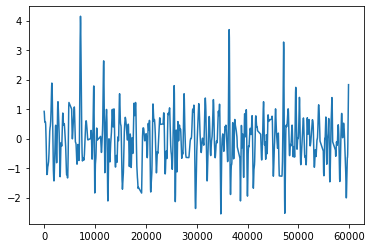

1


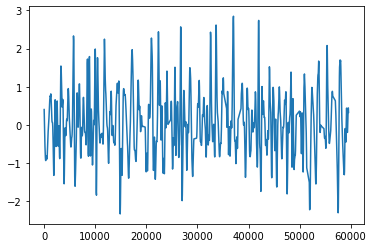

0


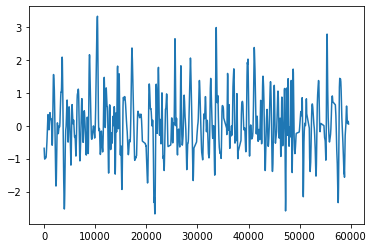

1


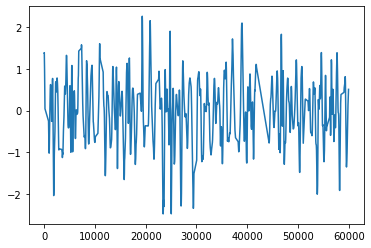

0


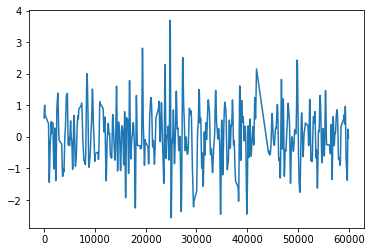

1


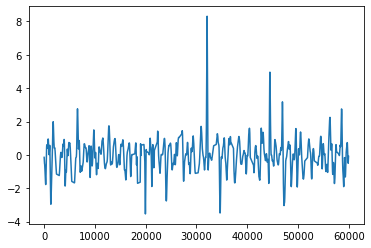

0


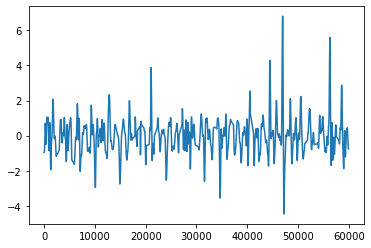

1


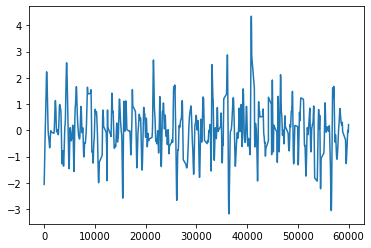

0


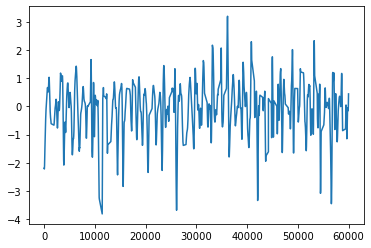

1


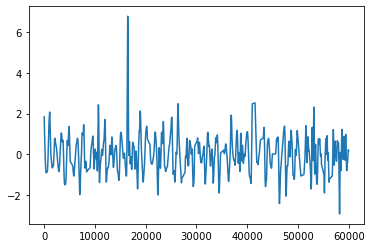

0


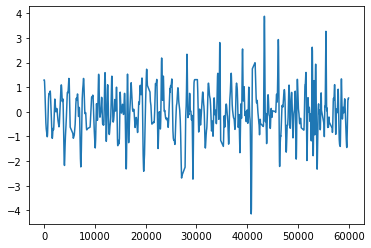

1


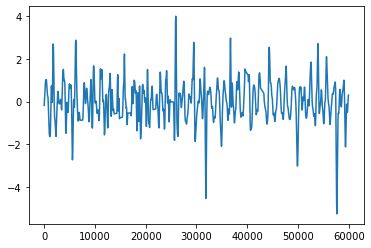

0


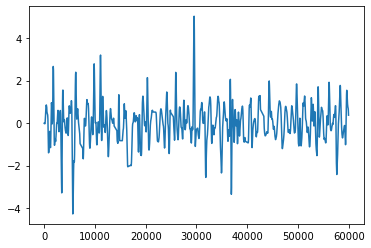

1


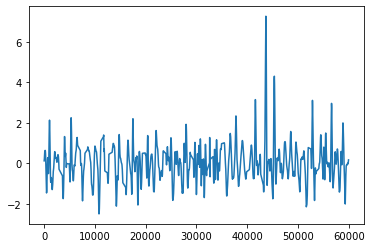

0


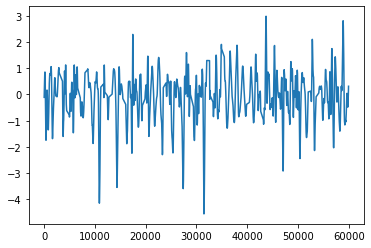

1


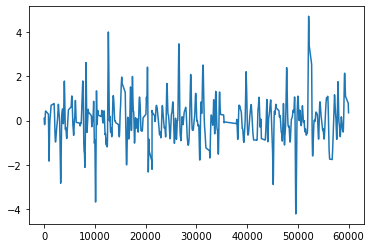

0


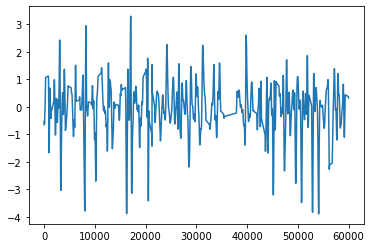

1


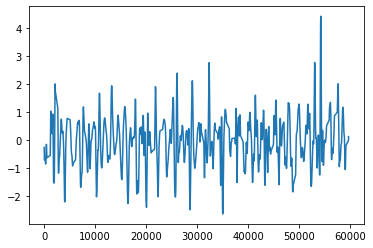

0


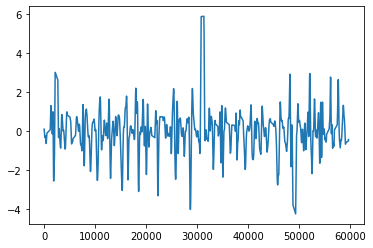

1


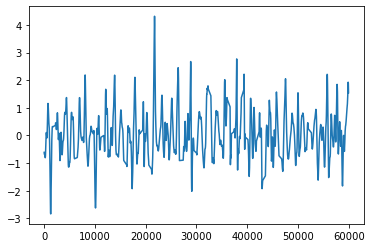

0


KeyboardInterrupt: 

In [18]:
from scipy.signal import find_peaks
from scipy.stats import iqr
from scipy import interpolate
Fs = 25
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
%matplotlib inline

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff=2.5, fs=25, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

import heartpy as hp
import matplotlib.pyplot as plt
path = './images_ecg_ppg/'
%matplotlib inline
for threshold in [0,.4,.5,.6]:
#     if not os.path.isdir(path+str(threshold)):
#         os.makedirs(path+str(threshold))
    new_path = path+str(threshold)+'/'
    f_data = []
    for i,window in enumerate(ppg_window_col):
        ecg_window = ecg_window_col[i]
        data_col = []
        for k in range(0,2,1):
#             if np.mean(window[:,11+k])<=0:
#                 continue
            index = np.where(window[:,11+k]>threshold)[0]
    #         if len(index)<=.7*25*60:
    #             continue
            y = window[:,17+k]
            prob_series = window[:,11+k].reshape(-1)
            x = window[:,0] - window[0,0]
            x1 = [x[0]] 
            plt.plot(x,y)
            plt.show()
            for j in range(1,len(x),1):
                if x[j]-x[j-1]<50:
                    x1.append(x[j])
                else:
                    n = (x[j]-x[j-1])//40
                    x1.extend([x[j-1]+h*40 for h in range(1,int(n)+1,1) if (x[j-1]+h*40) <= (x[j]-40)])
                    x1.append(x[j])
            x_new = np.array(x1)
            f = interpolate.interp1d(x,y)
            y_new = f(x_new)
            y_new1 = np.convolve(y_new, np.ones((10,))/10, mode='same')
            y_new2 = butter_lowpass_filter(y_new1)
            f = interpolate.interp1d(x,prob_series)
            prob_new = f(x_new)
    #         data = hp.get_data(y_new)
    #         working_data, measures = hp.process(y_new2, 25)
    #         print(working_data.keys())
    #         plt.figure()
    #         hp.plotter(working_data, measures)
            peak_loc, peak_dict = find_peaks(y_new2, distance=Fs*.5,height=np.percentile(y_new2,40))
            ts = []
            rr = []
            p1 = peak_loc[0]
            indices = []
            for m in range(1,len(peak_loc),1):
                p2=peak_loc[m]
                if 400<(x_new[p2]-x_new[p1])<1200 and np.mean(prob_new[p1:p2])>=threshold:
    #                 if len(rr)<3:
                    ts.append(x_new[p2])
                    rr.append(x_new[p2]-x_new[p1])
                    indices.append(p2)
    #                 elif np.mean(rr)-3*np.std(rr)<=(x_new[p2]-x_new[p1])<=np.mean(rr)+3*np.std(rr):
    #                     ts.append(x_new[p2])
    #                     rr.append(x_new[p2]-x_new[p1])
    #                     indices.append(p2)
                p1=p2
            indices = np.array(indices)
            print(k)
#             print(prob_new)
#             if len(indices)<2:
#                 continue
#             fig,ax = plt.subplots(figsize=(10,6),nrows=3,ncols=1)
#             ax[0].plot(x_new,y_new2)
#             ax[0].plot(x_new[peak_loc],y_new2[peak_loc],'*')
#             ax[0].plot(x_new[peak_loc],y_new2[peak_loc],'r*')
#             ax[0].plot(ts,y_new2[indices],'g*')
#             ax[1].vlines(x_new,0,prob_new)
#             ax[2].plot(ecg_window[:,0]-window[0,0],ecg_window[:,1])
#             ax[2].plot(ts,rr,'y')
#             plt.savefig(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXMAAAD4CAYAAAAeugY9AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nOy9d7wlR3km/FR3n3PunXvv5KQ8EgqgQByyEEnYgL2wYHvXNmsDxob1Gtu7xmbB9oLtxRGHzwl7ZQwGDNh4AQtWtoWMhSSTpFHWKMfRKEwOd244obu+P7rfqreqq7r7hHvnnpl+fj9pZs7p013dXfXWU88bSkgpUaNGjRo1xhvB8W5AjRo1atQYHrUxr1GjRo0TALUxr1GjRo0TALUxr1GjRo0TALUxr1GjRo0TANHxuOjGjRvltm3bjsela9SoUWNscfPNN++XUm5yfXdcjPm2bduwY8eO43HpGjVq1BhbCCEe831Xyyw1atSocQKgNuY1atSocQKgNuY1atSocQKgNuY1atSocQKgNuY1atSocQKgNuY1atSocQKgNuY1atSocQKgNuYrALsPzeMb9+093s2oUaPGGKM25isA3/tH1+Mdn7zpeDejRo0aY4zamK8AzHXi492EGjVqjDlqY76CkCT1rk81atQYDLUxX0HoxMnxbkKNGjXGFLUxX0Fo92pjXqNGjcFQG/MVhE5tzGvUqDEgamO+glDLLDVq1BgUtTFfQejWzLxGjRoDojbmKwiJrKNZTlbsOjCPX/7ynejVq7MaA6I25isItTE/efHez9+Cz313F+59evZ4N6XGmKI25isIdZj5yYsDxzoAgECI49ySGuOK2pivIMS1NT9pQTZ8oVtnA9cYDEMbcyHEGUKIa4UQ9wghdgohfn4UDTsZUcssJy+aYToUF+rSDjUGRDSCc/QAvE9KeYsQYgbAzUKIa6SUd4/g3CcValt+8qJBxrxm5jUGxNDMXEr5lJTyluzvswDuAXDasOc9GVHLLCcvGlGqs8x3ese5JTXGFSPVzIUQ2wA8D8B3R3nekwW1zHLyolHLLDWGxMiMuRBiGsAXAfx3KeVRx/fvFkLsEELs2Ldv36gue0KhNuYnL2qZpcawGIkxF0I0kBryz0opv+Q6Rkp5hZRyu5Ry+6ZNm0Zx2RMOtcpy8oIcoPM1M68xIEYRzSIA/DWAe6SUfzh8k05e1PXMT14EQaqZP3Vk4Ti3pMa4YhTM/OUAfgzAa4QQt2X/vXEE5z3pENcyy0mLOEnT+J84VBvzGoNh6NBEKeW/A6jT1kaA2pafvOjG0vizRo1+UWeAriDUoYknL6jAVl3TfvnQ6SW48rYnIE8QFlUb8xWEOprl5AVN5HVN++XDn/7bA/j5v7sNX7t7j/eYQ3MdXL3z6WVs1eCojfkKQm3LT15omaU25suFvUfbAFKD7cM7/+YmvOczN+PIQne5mjUwamPugZQSf3jN/Xhk/9yyXbOWWU5eKGZeyyzLBipuVjTsdj55BADGQoqpjbkHD+49hj/5+gP4hS/ctmzXrGWWkxfdLJqlZubLB5FZcwn/uKMVU28MiFZtzD3Yky3BWtHyPaLamJ+86MU1M19uBMTMKxjqcVg118bcA4r5DoPli7ocg/5SY4mgHaB1J1gu0NiuMu5qZj7GoCSOpSbLXIurmfnJi64KTazT+ZcLtKtTlXEXj8EkWxtzD2jZu9T2lS/fxmEpV2NpQMyvThpaPlRxgBJ6ycqXv2pj7gENrqVmy3z5dqIS809/+1F84abHj3czVjQoaehEdoD24gRH5ldOiB8x8yqRKuNAtGpj7gENqpqZD48PXbkT7//iHce7GUuCuXYP2z5wFT7x748MdR6a1HuJPGELrv3yl+/Ec37ja2riOt4gd1iVcVdr5mOM+Dgw86JrXX//Pmz7wFXYO7u4pO2p0R8omeSK6x8e6jzcoJyoWaBfuf1JAON5f+NAtGpj7kFvBNrl4wfnSztBXFFm+fS3HwUA3P74kaHbNW7YN9vGpb/7b3h437Hj3ZQc6JW1h3RcSqlrmo+jsauCRpDeX7e38g2jjZqZjzHo5ZGu1i8WuzFe+4fX4ff+5d6S6+iBW1QCN8oGwkpZoi4n/vmup7D70AI++c1Hj3dTcqC48PaQ8eGJlGg1yNidmO+4keVsDDvxHQ/EtQN0fEFGdkBbjrl2D51egk9+81HsOjDvPS6uKLNEYdqQE5W1jSvImA+7DE+kRCsKAZy4ES1RJlIPO/GNCqKPwT0O76Q25h7QyxuUmdPvO3GC3y1g51zOKXJ80UAYB+3uZAIZ80H7CSGROtv4RM0CpT680iJ2qoyocYg0q425B7SsCgZ8QtRhz9k4havufAo3P3bQcx3OzP3nGwfNzoVxKFA0DGilNEyiMD0jkllO1NWX6CNJZznQzysbh35cG3MPhmXmNCDffdk52DzTwkeuusfZIapGs8QsdG2ccKKvJEbBzOkRkcyy0pj59ffvw9s/cePIDNpK6xJVbmultdmF2ph7EA/pACVmvmaygZ96xTm4dddhPH00H1bYb5z5uBnHcZt8+gVN2sOoLGQkJ8gBusKY+Xs+czOuu38fFrqjcVyuFGbeDzVfMW0uQG3MPRg2aoS08CAQWD/VBOAOyeLRLEX9hYzFuBnHcZt8+gWx6H6caTY0M1+ZxpwmmYXOaIz5SusTRSVwCbUxP45IEom5dm/g33eHTBqi34VCqEgUV30Hg5kXXEtkNGLcQhOL7ul44ZH9c3jtH3wD+2bbQ5+rOwLNnPrKSpVZJhppu+aHNOY0363ALlGKcWjzCWvMf/fqe3HRh68eOKaVjOygL5FsdBDoUpsuRlJVM0cfqccrCSux2twV1z+Mh/bNjWRvx1Fo5tJi5ivNAUrtmusMTo44xoHl2hiHcXdCGPO/u3EXnjy8YHz2L3elA3XQbd+IcQ3LzAMhVEiWSyIxolkKOgyZinGId+UwC4mtjLbTu6WMyypIEon/+X/vwC27Dhmfj0ZmSZ8LJdWsNMMRUEjhiDI3V8r9iT5E83GYgMbemO+dXcQHvnQnfvqztxifT2ZLw7n2cMy8ase7Y/dhI91cMmMeBv5BasSZF2rmxO5XFmsrA7/npZ6I7nnqKJ46slB6HBngRlR9MD92cB5/v+NxvO8Ltxuft0fgAFUyS0ia+co0HMMatH5Kzi4n6miWFQLSPec9+vigGnO3j3rmTx1ZwI9c8R189Or71GdKZhECRABdxrxqBijZinFzgHI/ge3YOzzfwW//0z1YHFGUxBv++Aa89Lf/rdSgD6JvX3ffXgDA6onI+FzLLP2fk0CvtLlCmTmB+z8OHGvjZb/9ddz1RP+1glYKy+1nAl4pq8oijL0xp6p1lHBBoGc/qPEjBlzFgfeR/3cP5joxZhf1hEKSSSCgmPmxdi9nuLixK5JZaACMogDYcoIvJOy2f+Kbj+L/XP8wPvvdXYXnqGIw+aT9yt/7RuH5yGgudqtN9FJK/NpX7wYANCxphtoWDqWZS+PcK3UjBN4/v3HfPjx5ZHGgapHjWOJ3HJo89sacBpOv/w9qzMnwlLGI6+7fh6vufApCwIjDpcsKppm/7ePfxWv/4Drj91UzQOm47jIN9G89uB97HHHx/YIbJtuxR8/lwLHiqJI7M/Z3/tYZ7zFcTitzIIZ9ppXzPmQbc5qcw3D40ESaZFbahE13xvsqvddmHxuek0Y9asP48RsexrX37u37d3RfH736vtLVYdXVRJJIfPHm3cclvPTEMeaehz2wzKJCE/3HLHZjfPjKu3D2xilceu5GIw5Xa+bmptBPWI5abiiKVgGqvvoyUYQf/fh38eLf+nrhMT/zuVvw45+4sfAYUzM33wW9s6hEo7jpkbQUwilrJrzH2JNckVRB/oeqIYC8MNS6qYbxHRmBYaJ2khXOzOnOeP+kKp6DhFGOWmb5yFX34J1/c9NQ57jnqaOF31dt8zX37MH7/uF2/PG/PqA++/ZDByr5cobF2BtzXwU2SgQY1JlEMkuR8fz4DQ/j0QPz+I03X4RVzdDJsoNAFBqrqtEs1JlWUtTaVXc8hevv31d4DL+lnDEnKarg+Ugp8eSR8hWCfW6S31wgSaRqCCA3WLY0Q8a8O8QkS++2Ga1sByi3Z70+ZEiCdoCuvPsry251Nfn/3fGk8tk9sn8O/+2zNyt7RJPDQifGj/zVd/DOTw432VTB2BvzsjhfF8tZ6MSly6puBZnl+gf24zlnrMUrztuEMBBGx04YMy8yVtwIFXXxoj1J//6mXbj5sUO5zwfFKBOTeHadbXBjNUH577xqaClJExTFdGi+4z2WukrVUDueqzBvxVqTcR/mmdErbYYruzKmKzJpkJXiSrg9KSXu36Ojz8rK8trjbv+xNt77uVvx3z57MwDgPZ/ZgX+682k8la28j2UBGSRVPjxgiHQ/GHtjTi8hsjRL5QB1sJzn/sbX8IY/vqHwvHGJzPKX1z2EGx85iLWT6bI7EMLo2PTyuWbuQtUSuL5t7Hpxgv/5xTvxA3/xrYK76Q9V6k1//IZqji8+l9rnpXsvmlh3PFptkiKW/boLtwAA5gtCUukRVtU1OTNfsJl5ZuiH0bnzzHwFLb8YOFmhNg4y8awEB+hf3fAw/vWePZWPt5t8ONuYWkXTZRJraI31XoUV/qgwEmMuhPiEEGKvEOKuUZyvH3R67odIj852gB5r99DuJaWMTyUNOV5CN07wO/+c1iin7DibmdNf09DEasy8imZuD579x/wMdFBU0UE/ctU96u9FYVt88rHPSwa4aIl746Pu0sE2yJjOZKGDReekPlHVaPJJaMFi5uQnGcYxTa+UNPOVxsyp9/KxoAMEBjjPMsosd+w+jK87jHa/K1m7zYezld9kM+1vpAxQX7Htz3KEFI+Kmf8NgNeP6Fx9gQyCHRpGBsZe/t7Up3FwdTwe5dHKlvWhEM4KiIHQziIXDJmlQjSL3R572T8K9LsTTJHx4c21tWDNzP3X2/HoQWxZ3SptAz3H1dlKyWXMr71vL/7omvuVP6SqZt7O2jfTinLnXeyRzDIEM09MZr7ScgmUA5TLLNkzHCT+epSTVdm53vRn38S7PrUj97n9vspikez7pD5LPI0IG60ytf1Zvnc5EmMupbweQDUrOWLQQKvKzPdWDLdTTNjRWbksQMw8CNwySzkz10a/iLEkHn15VGVJOaow83M2Tqm/FxmfImZOBtgns+ydXcSjB+axfdv60vaQYV49kRlzR1God37yJvzx1x/om5l34vRcMxNR7h6o7b1EDpxYojXzlRmaSDCc2T3/+OjnPMNiUEmq3/o3dpupT9DtE5fUxjz993JOzMummQsh3i2E2CGE2LFvX3EERD/w1ZNOPEy2anq/Zh757ziTVDKLsB2g6Z9BiWau6oREQaEx7ymZxW5LdWP+6P65So66KpLBDMuErGrM7YHXKTHmpJe/qIIxt2WWoueiYvarOkC7mvXbq5Y2u86gA1eFaIYCQqy80EQCf5fUxn4mHgoJHWU25aD7ifY7Ydpjk/oEfUrKwKL1+XKW31g2Yy6lvEJKuV1KuX3Tpk0jO68vaYjGlc1keVncIsPmkzUAswM1GTPnp1Nx5kF+1cBBBqAVhYVhh77JaaFTrbPc9OhBvOr3v4Ev3fJE6bFVnDVcMil6jvxUfgeo+/c3PnIQE40AF526ukJ7ymUWAvWBfjVzFzPn1xlUPuCruEYQrBiZ5eF9x7ybp9D7H6Qq6SjLIi+XszjPzDMSmf07EKbMcjwytk+YaBa7g/gchnNs+V201KLO6hqgvANTDeowMBmHWZvFb8zJOLSioJCx+EITq2rmVATsO48cKD22ymAza64UHc9kFut5l8ksNz92CM89Y20u69IFOpdygBbU3qZIhHbfxjzPzLlxH7zCZvqnyPrKSqhZ/92HD+A1f3Ad/mHH4+qzxOjfZMz9bb111yE8xIrPaQfo6NpZNWnJHltVNqTgsAkO3TeNbSWzqCTG9N8npMyyVKCHaj80enlFxq+oI9CAco1P3oGVZp6TWbgDtIiZJ4iCdBBX2QN0UM1cbaZboXNVYZiccRQdb+qstjHPmLmH3R041sbp61aVtoWfS2nmBc+FvrPb4wNN3qsnIsSJNIwt70ODDlyeLRyFYkUkDd2++zAA4IG92hi7WHq7wHn9lo99K1e+AhitzDJISYZBkJNZKL8lG9s2MyfDsZzGPCo/pBxCiM8DeBWAjUKI3QA+LKX861GcuwxaZrFn3hSu0ERCEasoKoHLO3DEXqarAqJwMPMkkbpGdCwRhSKNUy9474lncqqqmdO9VslU5JJVnEjnyoI/16IBxd+Lj5n7WHQiq1cjJAM71QoRiOLnoox5RUNwcC4NQ9swnUbVdOIEUZjfSGLQlH7bv7ISQhMDpW/rz3izlDEfRGYZ4f3xyVRKqUjLD/3lt3Du5mn1XbuXGCu8fmqZA/nVBBEBu39Se46HZj4SYy6l/JFRnGcQ0GCyjbavlglPJili5nReF1t2xYaHVjSLNAaouQCKpUQAXR+kEQYQopg19zyTS9WtvBY7lNxS3rns5JAwCPPtidMVRS+RJQ5Q/Xf7eZNU49PMY+meSFyg99UIA0w2wkJHNz2Lqgz4sQPzmGlFOH3dJIB0Ml/VzK7bS9DI2PSwDtCUmQcrwgFKJCX2VPWkNvdVm2UJ6plzQhYnUiUP3vToIdzEEs4WuzGmW35zV7ZYsFcT9jhUWcXWir7WzPsAJQ3ZM6B2gJrH862vilhFUVKEq2xtIMx0fD5A7Yp6dvW5ZhiUyiyJMubm51xOKFq+ajban8ziW710E6kkpqJ2S2tiMM7RK2Z3SSIrb8dG76sRBFg/3cTBOX8lRtI1q4andeMEzShQzm7+u06cqD0yh3WAUrbwqA3A13Y+jS/dsruv39Ak6isE11PMvP+JZ5TZkLxPUZtc46CsnWXvzu7jtl+J/mkX/hs7meV4gh6e/TJ89cj5Jr5FL7ho2zhuEKlWeSqTeBygwm/Mu71qMovPAbrImHk3lmh6ds+h+6niMC0KJ1TtyQzcXCcuyQDVf7efN4VA+mSWfpg5tbMRCWyemcCeo35jrrI2q+qtmRRGzm4us3V6CdZMNjC72Bs4SsNYxYVi5Abg3Z9J64e89fmnF7RBYqEbYxVlNAZUrtbtG0mGMeYj1MxdDminn2uAErfmSsT8zrdHcMdm5rUDtDraHmOumLX1+ROHFrBtwyrjty4UySx07u+5cAve8bJt6YfCfOGabeVDEw0ZI2EySyVmbhlzdg9Fxok6Fd9Aw4eisrX8GJ1+7j9X0cSgolk876EfZk7nioIAW1a3sHfWnxxGDtd+nGdRELANl7VklUhd3GtwzVyv4o5XaOJXbn8SF37oajyYOTyJgPBVgnQY9n4086WIZuk6HPGuSbW8kJbrM/3hzY8dwvP/9zWq9r5v9XQ8NfOxN+aKmVsvsOtg5lJKHOv0sJEcWRWYuXPfzuzcv/XWS7BmlS60xXUWLb/kk4b4oO/GqVG0mb0Nuo8iB2iRcaL7mPNsr8eRWCsHF6SsVkukKAO0x8I/XW1PHaBVjXl6rmYYYPPMBPbO+pm5KrRVMWmolySIQpHboYiuSfU5bK17drGLB/fOlp7fDmNdqtDEov5+zd1p/ZI7n0ijWLQxcjNz6o/dWPYtL40yzpwmVkA77l3jqCxQwLW65O285u49ODjXwd1ZadtYrQIsu6OYuX4+y4XxN+ZkdGP7oeaZebuXQEpgbWaAi425f8nWZfosQcCOw03/DITIlcA1mHnmQAuF8O6WBPiTmHgnLdKAyXAeq2DMefv4YOFImARSqJmzv/sKbQHuwZZG0pQ2FwBj5qHAzESEuXavNASuL5klEIyZZ5p7dj+TDfek9uOfuBGX/+H1pRoxX8WlDtClMQAHCvwI9ipLyQjsGD7EjCililJLUXhskkh8/Z49fYctdtiErAiPozm2Uc1ljDsu62rKqib5R8zACzrUllmWMzJp/I25g5kniWYL/GFS5MeayTQUwbf04r93yyxZwgBzbAZCuB2gjidsVJ9LEkRBucziC5XkkSBFLIA6XyVjbgxU9zkTqcsOD+oA5UtVV1x4LGVhLXjjXFmbG2GAVc0IiSxfWlfVe7txKoURMyfNvJ1NdJM0wK3ncOuulOUWbZQB8DhzcoAuDTOnEEsXaAVkM0tpjStCbwBjrs7j6C+fu3EX3vWpHZUylPccXcSRLPGLEwJVbrYkAq1qm9wJg7Ridx+jZRaZtak25pVBxslV0Q0wBxgZjDJmbvzeKbOkn3H5xC6UxQeo7/cA0IklGlFQ3QFqNdmQWYqSoLLfL3aTvjq279hESrUyKYyPZz93xZnTI3Qln0hZXTOnd9kIBaZaqXEtk5Tse5NS4pZdh3D3k+YWYhRrb8tKmplnMotnMt1XssepEWe+BA5QwtEF//Og90CEx2DmxDIdSXFAdd28SDN/eF9akrpoUxHCi3/r6/i+P033I+B9nvqaS8Ypm3Ccxrwg+MFm5sL6nu5xObN5x96YH81YDx8Avg0fqBY1pXz74nmVjBIK51JLhcFxDUCYx/IBasMI/evGaIUBgqCiA9STiZa2u1wzB8qNXFxggAlSasduVc08F80SS8xkGZtemaVqaGKWSSuEUBEZZTH49vP65DcfxVs/9i288U/MjUu6iUSUhY+m/zZlFr30dj+HoyXMnIe3DhKa+DfffAR3ZZteF+Ez33nU+52SCdRKN/vc6NNM0qgQvuqDS2YhpzSVlPaB3tnuQ+mOPkbSFq0mHM0pC0N1DT3XeboeZm4/PyJztcziwb/c9RT+6Jr71b+TRGLWxcw9Gz7Q4CYD4nvQ9MJaUeicnXtJkotSob/aZQRcKgG/7kI3xqpWWOoApczNvMzi1sxt7ZFPdmURLWboZAEzD8ur4PHm2jJQN068m0lIKVMHqEdmeeFv/qvasovOTbIPadtlRsZuz47H3FWce3GCRiDUSoSMrXKAZgbIZtTUP8pkFvqZyBLM+kkaklLi1756N77/T/+99Nh/uvNp73f0mHu2zALoZB/DGap/W5mZF+wBSj6vss29fWWUefuWlpmTMU+Mf9vXoV/WMosH33roAD797UfVvx87OA8pgSlrM2UzXEn/XhtzYuYeYx6TMXeXpe3G0nB+Ajo9mE7JB6gNe4JZ1QzLZRZPqKQZmph+d2S+i+f/72vw5Vt1ogh/Pi7d/OM3PIxr79ubu4aP0XAHaPHmFFxbNQd9L05UVp6dBUqn9DHzfbNtwziRrg3oFVPZALbv7RjLGuXx+L1MZqHJgt6Fklk8zHwq+/zoomnMc0Wf2MTfr8xSNmHlN1VwG14V4WORBjMcUR/P+0jR5iIuuIxkxQWY13gCxfvklkuLrs8ck4KVcZ7TzGsHaDWEgdnRaWf4S8/bmMuqJJgyS2bMMwPie9AdZsyldLDcOMntOWozc1nAzO02TTaiNIPU0XkOzXXwhR2Ps0nCklm6sTIa1GHvffooDs138ZlvP6bbXGDMF7sxPnLVPWoHcdMB6jPmegelxw8t4KNX3+vUB+lUzShwsCqpCmPZRqbqykafSxtzSpzqFqxU6Hv+OU8sOcC24+tl5ybWSM+S+okvA3Qq62dcq/6df74Xr/i9a90VNoP+M0DLJDN7wvKtysjA0jtUkoX6nzsDFKgusyjCM4SBs+/HkFmUX6mcmeejWfK/KTqPneFpH9uzmHvVyWoYjJUxt4sQPX10EVEgcM6m6VxWJcHlACWZxceAaDCRfmcfliaRmG9HLyHpT5l9XuwATbPuwlyhLsL7v3gH3v9/79D343CA0v2QJHIo8/RzxsSTF2xjTiVhCaYDNN8mMkTEzD969b3482sfwrX35TcdIa/+dCsyNGwpJTpMZrGNudp2z2HN5xxZrL1Yyz5k1Lkxd9+HX/vlsk8vSSUcKq5FA5V+S7KO/f5IS+cyy19e9xB2H1rAv96zV32Wr83iN3a7D80bq4Yyv0DeT+E2vGrDjjjB7kPzegKSun1GRuRQ0Sx9HW7Afo+uDFDX+cuYuWuyd5+HJj2TmedKcFvfu0jhqDFW6fyhlR134Fgb66eaaFibKXc9zJy0PbUs9rxgLrMAmaTAqqxxFkhQu6iAXmLW5ioO0MidNHTzY4dUMofrfoDUYM9MRHj6qGYpRxY6WZv0cRQr3UskjlnszDbuZRmg9DWtToih73Mk6tCxMxORYYTpGj7NPLEmDKN9DsPciRPVjqZDZvEN5lRrT//e7iXpxtyJNEoMdOM0A5QmcLvWvd6702Z/6fEuB+iOxw7idRduMe4VKA9NvOz3rsWW1RP49gdfC6A8GYa+f/6Za3HLrsO553DzY4dw3X17mTGXuPR3r1XfS0hnwlqaAZwWGOtXMx9GeuA+nENzHdM/VqCZD5IB6jrPL3/5Tjywdza/krFOQHKVUdsmkbkV/Sgxdsycd/SFboKpVoQwSOWQhLELgrE0JMZdsnGuklk8y+denH8pdsnQwjhzi/k2IopmMY/7gb/4Vu63dgdb7MXKIJKRIbYWsQknTqQKybSNt71UN2QWpzFPv9caNVWAzA9qYiNpIo9pIAFg3VQa83900d0G12ToinHmA6XhKIjlM+bc4Ld7MdY4dipKZRYdmmhv9u1j5tRXSTNPQy3T757IojHSz9M/y5j5YjdGIoGnjuhSBWVRGmoz6gl3OO67PnUT/uTfHlQTsT0hpeMq/Tvve7GUyvFbVWahnxcx1DLyyt/j6//4euN+imSWskzMqjILkEY92Xkf+dpQprEHRpv56sJYGfO0sqB+yJ1enFUcTL/vqQeoH9qug/P46u1PGt9PKPnE/XC7ltG3j6NaHRy2p75KnDlJDc0snb/KMizPzJnMoopppYaIzze9RCpDVcbMi1Lw03anfxJrpknDNajpXDOthnEdWj1tWT0BAHj6yIL1u/RPl8zimmx4GGNTySz+SclZAbGXYK3DmFOcuXb4mmys6SEH9O8v7NitzkmH8FUMrebK6pnvOjiv/k5SS5nEQayZJnyf8d/nqTkSJ9Ips8SJVCGgVY252pS8ogO0GydqhywCb/+eo223MR8omsXfXhfUpuAeY05j0WbmS4mxMubEAM83UQoAACAASURBVKkztHsJWo1AVS5UNZbZC79112H87OdvBd8hZqJRzMxtmcV+p1Srg0M7QJG1hT7P91K9gtDGoCyahWDXmiGZBdAd1hezTftjzrbLZBb9d7fMQsycZBZdmz13bPYRpdir86qEmxCnrplQ2ZL6d2Tgcqc02CM5LROps0WraObEKvkx7V6iau0Y1SizYmh0vzmZJbuePdHachV/znyyoNuh2iy+QX/PUzqZiRy0/L6IDHz9nj342s400mfRYub2c6A20/3axj6R2pjzr1JjTlUkq8ksRZo2x/17ZvHhK+/CS37r63jNH1yHO3frGPp89Ii5WnAdA+T7sb05hbPEQEE77cJ3Pmbuq22zFBgrY05GW1Vs6yalzJyw0I1VR54oqXJHeulUxjxsJkH6M4cOTTRfYlE0Bg2cZlY1scrLdjnsyEh3LGZuywyNMMB0K8ppuDmZRZpG6JZdh4xVg2bmZihgITOfaGC+E6tBoLJoQ4FLTl9jRI/wNjg1cw8zp3eiWDfXzK220YRuGPNu7GTm9L59DlBVgKsX49ZdekMEThaePrJorIj4MzdqswTCG2d+79O6aNcrfu9atHuxcY/0LN71qR2q7C3f8s6+X0C/S7pfe+z0EqmMeCIlbn/8MD74pTsRJxLTE9WSs+xrFUWzSEi885M34fM3PY5nZDsFPX1Uy0r8p2esnzQdoIqZ589rT1L2HqBV0/kJPDRRSpm3ER7NfCkxVsbcFRrGmTkZZxebnG/3ctEHdJ7798wajkYK3yKN2c4EcztA0z/pdaVbWHnizImZsxT0MCiXWYQwVwnEwFdbMgsNTHsJGgUCW1a3jOU6oJk5PV8+2K7euQdv/di38Nnv7lKfKWZuGdpOnODIQhcfv+FhlgmXfkerhzlLHmiEAdZMNnKJNbzqpA0jLK6rDSsdqzT8As3cx8zXZlsIcWOeOknzoYk0gMmY/+4/34e3fOxbuPfpo6pN61bpyYF8ButWNQwDyFdxRcx81wHzvd339KxRCG2xk+/3xMwpnt9ePdE9KGNuTSRkrNJ2Svzs52/F52/chccOzGH9VBNCFNd84bCJjgsfvfo+PHF4AT/8wjPwO2+9BIA58dFvt66eQKeXuEMTB5BZXLWBCpPhLCPt85dwzXypE4jGypgrzTImmSVGKwqVNqzLcuZf3FwnVjptI0vNphfw+v/vevzUp3eol0cOK1pyu2ZdrwNUsRh/+VY6n9rqrKLM0ooCo9OQAdw4nRogmhxoZWEnVISBwCWnrcG/P7DfMJ6fvzHdgd2V/HLzYynTvOUxzTjtSBM1ufYS/PpXd+IjV92jfkcMSBnzdmz8pukx5oMwczq26ZBZbGZGqzMqJEb+C+UA7XDNPC0VoIy5VZGTrkcM8qnDi9lxiWKvi90Ys+30HjfPTBgGSvlXAqiIIxcOL5hG84+uud8ohObaGJuY+ZQnt4ImFbusr753acgXNDkdXeypd1fdmJt/mkifLYXJCkA9u1nHsyKHOne6FxnzMpnlvqfzpYqLHJZG+RCHMSffHj9ulDssuTBWxlxl4LHaGLTlGsDkC8Z4CfOdnhqEUebM0hlj6TH7s6U+daj1GUuzO0eXhcERbAdowiIXbNjtTB2g+etMtyI8Y9OU+nczDIwORoOInIg0EF3GnJj5m593Gjpxojrv7GJXabE0+bgGw0FWAImel5IdsoHS7sXYkxk0XcEuPZaMOa0CeMna1RMNLHRNyUCz1VxTDClAMXOJnGZuhiaa9zRpJVp1Y2mUR160ZZZQO0AV67JkFgL9Nk6kkuoWu4mayDavbmGe7dBkMvPAK/8dnu9ia/auAWDTTCvnwLVBRpqKj3Gj8+j+udzxdlhkL5FMvjCrWIaBwPqpJg7OdfCPtz6BbR+4qjBUkvrVtfftxbYPXIXHrRUihxBCrSZMSSr9c7IZpsyc9/EC5l/GzO901LYpqqrAxwh/Rhy2ka+ZOYPNBMkBam9x1WbONUKS6N+FAUUNmG+LOuKeo4uYaUWKzdjGrdNLcgNYMfPs37GUTokFcGjmUQDhSBrqJQkuz2KRgTRUkncaqjBHxlxp5l2T/dLfwyDAGevSXZaeyqJHeMKQL2YWMBNfyAhph2BmzFmSkh2+Rw64OcuYN8JArYD4NYpkFpOZx+p4WzM39oe0jNQqy5grBtuMEAbClFnUblAija22GKDdF+g9dBOpDNJCN1YRKJtmWuglMreblUA6uXU9VuTwfBenrtXGvN1LDF+AK1LFZua8T7j2BbXPkUaz6L/ztxEEAhunWth/rI0/uOY+AMDegu36aBg9kk0itzD/go1ACEw2QgQCePzgPO7YfVi1AUhXVp04QbuXsM2naZWVP19Z0tAj++cKo7pscEIRJ+7NvNOgi1ozdyKnmRMzF+bLJGNOoVNAalxpR3mR7ctpvwD63cG5DtZPN5Uh+fWv3o3/+hle1ClRS2tCPjTRX1eEZ9sBUPeQi5qxHK2tyGbmtGw3d05atMqYpn9P792WO8iAnr1xKqcFE2Zakaofnd5j+qeqIkgrAkfRL5uZa2OuJwSSNrgxj9nEa8OMZknUZ6EwmXlRaCJN9B1lzLMIpkagkmHU9dh74PKc7YNRbWKx71xmIWOxKXtf820diQOkxrFIMz+y0MWpayfVvxc6caFfIE6kZubkzKcVUyLxpVufUH1Htb3rMuZ0v+bkGgUCW9dMZJnY7sQpDts4/vzf3eZlzG97yZkQQmCqGeGz392FN/3ZNzHf0RuO0GR8rN1T77JIk//H255UW765ICWw02LnPmNuh48mSd4BCqQkgD+PmpkzKBnAYua2zEJsZFVLM3OaPUmqCcP8oKHfdXoJWpGOkrnqjqfwLzt1UadOnGfmxMIf3HsMV972RLZ/pfs+8nJQvgSulFKxaULT0swPZTLL+ukmokCowUwao83Mo1CoQUBGlf5cM9nw1pk4ff0qy2FHhtgcwP9819N4dP+8cW/SYuZk0HqMma92GfMCzdxwgNKkkegELVoxtAtklpbSzBPjz2YYoBEGRvvTZ5dF7gQBq5xHmrlZtpVqvnCZpdNLlPHelG1bSM5gnTQkvJp5nEgca/cMmcWWpnI7OfUSFTaoy/Sm39346EHsPrSA/7T9DPM3TmZOBEUa8eChENg008L+2Xbf5ZAJLnnj9HWTeMamNJKFVhRASkCUzJK9v9nFHiaye7NXgzauuOFhb9tcbfHdS9MiVS7NHEh9e3Voogd2lmWaCh/mjXmXmDmTWWS6zyRVO3QlZ9Dg72bG2ieT0IqAg478H39/G37+727D7GKv1AGqmHl2Lde2czxipBkGhqGdZyGUjVAbGTLytsc9CnStbzIketka6DAriyxtWW1qszkHKDOUTxxeMO6N2pCLZiHNPAgUMz/qkHKctW2cmrl2gCo5hLNWy9DpaJb8u2hFeYNNzDwKdSEsOzSR0Okl6jvS5ju9RN37+ilzpyujNouVzczPCeiMWSBl+90CZt7pJaqqppZZ0n9/8ebdmG5FeOMlpxi/cTLz7KNYSsNxGAQpOZjvxnoD6EJjnv9Mv2f9GZ/Apxgha/diNXa0Me/mmLnPmE8W1ErfsrqVqwnvu5VmZGbpuqJZgJSZcxJx+R9eh09961FvG4bFeBnzrLU8GqQZMWZuaearGkxmyR44bfXmWs4qlpaFHtoyCQ2WIs2cUq3nOj1vLW5bDtIbOuevxbemazVC45iFbqzCGptRkDnxpHJW2ht2hEH6rFpRoHeUkSQV6Jrc9pJxy8yEkRhCX9NE49JqdXW59N+rlQPUjGduRkKFVvJSsZVr2/S0pMRXMY0wMHTyotDEr97+JF750W+o3/GJkcfDp3/qeuN2aCK/d/odEYpOnGC+E2OiEejPrGdEOw3x66pzskS2//NjL8CFp6zGYjcxVh9/fu1DKoqIftPumsY8TtK6M/9051N44yVblaZvP0+CKbPkmflkM4SUepIoqvjoCvWzd+qh50Dg7VvsJqotk6q8sJZZdDy8+/r8XHa3uuS0NTlm7psUbFJVVLzMtjEf/spOd+NGgPEy5izaIkkkurFURaoAzWbmOz0EQr9w+o4KJgHINgFwM3Ni3nZdFf69HWdu2+3FblIqs/AM0NCKZuGMkM7TsqJZFrsxJjIj3AgDZTA6vfTa9hKP2GWLlaOlZ6Bi72OZk4jWTTU9zNysVcKh6jpn/55uuR2gURCo98QjIbRmzgs0IWtzXlpI0/n19VODXKCZMwfoh668S33ejEyZRTlq2YouF5pYkZkfa/cw3YrUxGkzc77hiS89vBkF+N6LtuL0dZPoxuYWgP92716jnk8nTrCYlbxosEni6p1PY64T463PP90gC+l1zOv2ksQotMWNYBAILSMR0fFsAJ7+3vGZ40Pe97jM0u7pCKBJJpPZe7D65IyiVcPFp63Bw5YT1HeeVsO0Hb4SCb1Y9rXRyLAYS2NOMcEAnMx8djEdNNx5SA7QhsXMjVhkxsybbJLIfy8dmrnZ1nYv9ssslmbeDPNVE3XkTaAmoFbDZATtXqz0wmYo0O0lKlxx43Qrp+vRwG1GgY7Ptsr90uDlS92JRmoY7Qw7O1SUgwyeclhly2VaEWgHaKAG5oJDlw+EwClrUqcfhbK5smB5nHl6XmE5B82BOcGMAS8VTIbPLnWqmbnWtO10fkInTtTvuNGZb/ewqhnpnZCyycve0BnIP1N7q0J6h0Uhd91egsWsKiefJL506xM4fd0kXrRtfS6T2eVEpW6URrOYDlDKpNWTX3+auctxaMos3JgnakLnRE0zc3NyJHzqJ16Utq3gWV1y2hpICWP/V19ceCjMSDjfO/Bp6UuFsTTmidTaHtfMqcPPLvYwM9EwZA5a8uiyremgnGeV/GiJSdEqtjHWDtI4F8Fga7vtbuLV3Kmz5TRz1ie0g1Avve1olsVuogZTI9N5KVxx00zLyN6jaBYgNT5qL8Ps+4kcMxc4be0kTls7mStKRZ3crlXCYSdwhEIYK4Iuuz9lzJlR5cZ800wLG6aaKjbeVTUxjevnxryqzGJOAs0oQDMKczvK0LPjDtBekTFPzCiSTpxgrhNjqhWh1TDLH3CZpYyZK2OerR6KjDmF7rUapl/p4X3H8MJt61X0jOs6hEdZ1mkizSqgafExKrGRHVOkmTu+c7Fln8zS6eVlFkCXZtBtMM9H5+gWtO2S09YAMJ2gvqShWJpG2mvM46Rwchs1xsyYp3/Gia6h3Iq0tk0v+li7i6lWaOitiZTpxrxZ5wuzOPNjrMY2TRAko+SMOX3vimax2truxQg9T5eHVgKpQQtE6jx85ydvNJbpYSBUO1qN0Chy75JZODOnZ0XXpIFLhp9/P9Fgmnl27PXvfzW+8UuvUsaKjA/1ca5Rr59q4tJzN6p/66V5+u9ApLo+nzCp3TQx2pUK6f4B4PwtM7hvz6zxHW8Tn6iBLF6bDaS8Mdex6HxibkZBuspRBjuTg7JnELEoKDVRhaZR5O+PVk7tXoK5dg9TzdArs6QO0GLNvMFWV7bMYqPDmHnE6hrx0No8My82xoYDlK0k7J13XHDZRjLwhnzD/sEdoAkjJ9yZSYb9F//hdhya6+SMcFq+WBQ+q82rJ7B5xnSC2hPq6y/aih98welIkvQ7V9kIDhpLNvFbKoyXMWcdhwZCM8qHJi50E0xmyR+EOIGKMweyLehiaWSXqWSPTEaxjbGtqRtty7H4xCuzqBK+Dqno2vv2Ye/sosEIScejsDR9n7EywqnOKxUzV8ac6YiKXYYBFroxHtp3LK+Zk8ySsURubO0ts3iGbZAxb4Jt8IRIV1H0DLl8EWROWdLMeQEpeucXbJ3BA3tmcynSXDO3mXlRdiTXzLn/I+cAtTYaDgOtxXMnrW3MNWtPDUkazRJjVYvJLD2KM0f2jDjT9WjmbJ9TuzaJjU6cYCHbY5Yn3PViiUa2tZ7tpC8yeLEdmhjwiCaTHLhQtZgVf5Y805oX/eLGfIL9/Q+vuT93nTRJ0FypcXz9fa8EkHeCus4TZsl9sZTOTVA4Us18zIy5EOL1Qoj7hBAPCiE+MIpzusBDE1WSR5TPAE0Za2DJLIkqmARozZw7PEjDpGiVnHTSi1VGXM4Baj3Jxa6pmZ+zUafluzRzfq2FTsyMSIAffmEaC0x1Maj/L3ZjtcQkpkbbfW3I6rWYzFwbgqt37sFr/+A6VS+alv4ks/BbJyZpZyzyQRcIc1DZ2Xhk7Pnqhu6d2k/P44Jf/Rf85yu+k15DaGM+14nxxOEFQ69U0SyWzt/MySwezTw2yxnbcea2vNEIdVVDvgFJ5GHmYRCkslacaubTLcbMu7TSKWfmtBUi37S6G0t0etKYVM3fJGpbQl6LvcMmsDLNnCONZtHHU3QUfcf/dMHpAHUYeD5ueT/kkTVcZuEhyIcXujk5pxEGuZUaB8W0X7B1Bg/tO6Z9Q9ajCIKUeMRSImZ+M79mnqAXJ2hGofP7UWNoYy6ECAH8OYA3ALgQwI8IIS4c9rwu0DtOpFQPMF1CUodKv1/sxphshkZ0Q5yYurFbM9eGximzMI0yL7OYxy52E6MjXvnel+Nr/+MyAKywPWPmfEwtdGO2vBf4zbdcgnt+4/WOSStRRomkgVkqEjZp7nPKmTlv++MH07jwCRaamEjTUNudlsZKg81gFPJIsBOQUmau2TIZWppc6TvbGNAlzt8yAyAtiMSjZ8xolnKZhQ7hDlA+MTcjgUYUqDrZKqqI+1ps5ygzagBp5prR00Q1u9jDVNOhmSfaP2AXk+PnBPQuSnTOTpwYTkL7N/OddCzwMcJlFlszL/LXSWnKiZyZxxVkFpfhdh3Pxy0fVz1mzDlx4Cy9EeQL1tEKsyyyZKoVQco0KgjQ90SPKBTpPVPGZzMy36Nqs9DtHTeZ5UUAHpRSPiyl7AD4OwBvHsF5cyDjamrmofqcXhZpyQYzl1YGaJBGj3Bm/vtfuw+f/vajuQxQQrtbYMwd0Sx8oMxMNHBaloqtNtGw4swJ853Y0IzDQGSTk8mCFi2ZJTXmPTQjHcu8b7aNn/r0DiPao2kVIAM4M89HszQtWcDe0BnImHdDP5Mv3bIb3/cnN6jQRKWZd+1oFu2U5Yk1/LwAcP6WlD3dt2fWqZknuWiWwGCZvTgN1+S7EVHWbMNg5qHhIO5aMksa0mo6jwNhPotunKjJinIA2r0YB+ba2DDd8sosZpy5aSC4wzhtp8iiWWLlZLXRVTJLZDDzbiwZM69uAlIpS/875Jo5OR89TkPArZmXySyzRu4Bc4B6jLkrf6QRZBFKvYKZClpq/MlP7wCgJ1m9mk/9c+QAddUA4uchmWWiMT7G/DQAj7N/784+Gzk0M9Vp4ekeoGaHWlDMnDlAEzsDNMhp5t1Y4kNX7szYmsjJLJ04RjuLo/Wl8xNcmrldKIwv4flSf6ETMyMS5H7Pk6MMzTyWOLrYw+oJHZb5sWsfUrXauWZOoOdIS38KQeRtt7VBGiu8zUGgzwEAuw8tYOeTR9U9BiJ14KosW1aOGNBOWb5S4vdMk+F9T8+qqIRAaIPYs415YBrzDjNgdF6SKvgzTqNZHA5Q6jehGWceiPTd83NwzZyY+Z6jbXRjiU0zLX+cOWe6JZo59b/5TpxL/OHtmO+kSTU0FkgComdhEXMDtgRjF4/j0TD9MnOalFzGn1/jHS/fpv6eVidM/86llQn29ygMcslJUZi+H18BM4I9pumeKDkuDNJ7ptIgdmAAgd5vWmhrjGQW5AM5ACD3hoQQ7xZC7BBC7Ni3b99AF6K+JaVU2vDqyUgx6NiQH6wXkzl+ODOPE5ljgoBO57ezD9vdhIVEliUNxTm2bic38WgWbmi43MAHlP37hU6sQgpJ551d7BphmfPs/nicOcHe5FplyhbKLKZ+C+jQQxsUVy6EQItr0ZYG7GPm/P4v2DqD+/fMIo512J8RmsiNeZSXWZo5Yy7UxK1+FwqD1atJlWWAqn0f2QqG33ubaeZRmGrmd2dlhs/ZNKVXOkozT39nxpm7jTnXzIE0A5KKednoxGmhrclmukoNBFR6P92PEPnwRMJp6yYNX08azaIRsklMa+Z+g8kN94SVtcnBx91Fp67Bv2UOSq6Z+2SWKNO0OSYaYerrKAkT5P2DZ29yP5tygCZSGWk7a5b6Qlpoa7xklt0AeLWe0wE8aR8kpbxCSrldSrl906ZNA12Iyyy0/JqZaOSM3GInlR/s3cQ5e4syRxZVD+QdopcxF5dmTsWgSJMm5PYUlPkIF1vbb8fa0coNSjrzZ8t09rnN2hZ7WmYhNnms3cMMY+a8QJaLmVNHpPN0s2gW3nZfNEtgsbRWI89AFrqxzmBt6NDEThwrCSltf2rMeeKQ3dbzt6QOKjJIk00dD25r5q4480YUKJahSyAkuYmLO0B7thENhBG5oYw5Iw/dnGYeqg2cz900rSYSLbNwucYdzUKbUETWhMxrk9ggZk4sNgyEltUic2JzQUrkpEojmiXMTwQF/lNDy1abqluOcld7VEXGuNwBGoV5zbwVBUYZBsBd84eTnMVunIva4jtBcZll0apnQ59Toa1xMuY3AThPCHG2EKIJ4IcBfGUE582Bnn8igYf2HUMzCrBxupljB2Tk+IBIMgPZYLNsnKQySyDyxtl2SgKp4fMZc9d4sJl9oIyxDnFsWUwLMI0BdzKq37OonUmVAZoapmOZk42MghlKplkwgTqiTryQOf3ZdvToOHNdasAOTSQsdHRUTysK1Dlo/1YChRLa23dxKeeZW2fQjSUe2JNG4Ey3ItMBaoW0dSxm3mAx4q1IhyBywkahibYDlM5tl8CldzzBltKplGFq5oRT1qThpc0wgCtpqIyZN63+MrvY8xqL1JjrPhIGQslYfOL1lWpOpFmCOZGmQQ6Zxk/wMXNb+phkeQ2AuZS3wyWJ0FAkGWAyc+4AjgKRi2ZpqQlaf+6UE9jPFruxmph4bkqQ+driRKqxS5MyvWce5tuNE6OtSwn3+qwPSCl7Qoj3ArgaQAjgE1LKJakmQ51OSonbHj+MS05bkzpAs77cyzSqbiwx2QjNymZSGnWpKZrlWLuHqVaU0+7S2ix+Zk470hBcM71rjIRsGcgLdvEB1Yt1UXtuoPT9p89gsZsYMku3l2b8zUxo6SkyDFxeZuGOZADKuBUZc84kqQyBX2bR1SObzJjT/q38Gp1ekku55u2niJadT6axwKtaWoPPS0NmkkgawmdejzRzboBakVk1kSQVYmdcgokTLe3wZ8rT+aNAqEE/3Yp09E4jzDFzszaL+Rx6lo+hqYx512ssOr049atk7zYKAuUjmWDt9djylJlbfidOkPjKiuBj5jZbVuRBEjPXB9jEKGIkxrX/LDfmdlkMIJVJeEipD1tYeeFf/+rdasKJODPPZBYpkGPmE1kf5kXrllNmGdqYA4CU8p8A/NMozlUE7gDdf6yDi7MUXOUAlVItwSesOiaUbGIzc4oIsZe1rtos7W6idubJySyOAeFKGkqvm/6dG3OeatxLuObKNfP0zzSaJ9PuyQGahdOpfVEdUQoqA5Sdc9HyARAz5wNKySxxnkkGgQASqUIPbSx0E0WDWlFo1A/nzLwZBpjv9FR9cgJ3LD5j8xTCQKhd6lc1Im3MZT6axZZZ+PVStiYMwwvky+eqEEruAKWwS3ZNI5qlpxObODPnfYbH3Ltqs9gx0crHwEITgfT9tTzREnMdkzGGgVA+CZcklr1KA5El/yWG0RV5J2li3hPBNrC2zMLtrL1SMAIH1MSnj+Eyk6tSIWCGlPpw6Xkb8faXnoVPffsxfOV2rRTzRMOUmaf3Y0d5tRohsNgzcjZ6sVw2Zr48U8aIoIyZlFkxrWz5yLR00lxzzDxj7Xzw0dZdzTBfQTHd9Nm8PpdZ1k42je98hjv3GSvS0+4lOT0aSDttV0VRmLo03QtlS+o485Qxdnrp4I7YxEco0sx5B8yx3NAu2aqZJB3G63RwxImuHtli6fx2GWFf4SjejlYU4uzMISdEGsWgQxPtXXCCnAPUTA4K0xosvXxse6EDNIuCArINPwJibfr3Rpx5qI35DHNUcsmJT46+aBY7nb9hTExuYzG7aOrjUSCUj2jCMfHa0RyJNUGSvECIHJq5kk0su+kz5iq5jAkt9opYMfM4Yc8qfy4gtQ2uEEg7VNW3Grn0vLw/z3aAEnTBNJMQEWmgcbxcoYkjYebLBV4Cdy4rJwqYaf5k5Oz9MmOJLAOUjHmQ1alIl0FHFvIyiyvcsBOncdz2C3L1DaeO7mHmhjGPpUoaMUITBb9PU+umyIx2zywSxgcRdzYS6DxksKmeueEAbZgMhDNJalMYCOcA6cXSKbOQ85fgKxxlZ9pesGUGD+49hkaWWdlhzJxPfM3IrppoJwfpGixkUN592TnqmhSimQtNDFgGaKLvjfcVrplHgS4/u9pg5nmZJRC8EmWxZs6fnc9YUNgtHRswB6iLLTbCwHDmSWmSCZv1BlZIJh0D5MPZbAOrmLlVwwfw+5rSAIbsGNauHDPPzvm5n3wxNq9uqXubd0Su2XA5k/WELQyCp1dHJrHiu1hJ6Z9sR40xY+Y0Q8ssTTk15sppFGtjbjNz5QC1dhrq9GJndljDIbN0egmOLnSxZrKRM/Su3AuXjk4FvgCzYNdZG1apY7gD1NDMHcycOh85ENsWM+dsRFdfNHdvCQOWrBIneQeoJ85cySzZvbYt5yWQDkDuAPXJLGmcuVmSmLeZcMHWGfXsWo0AnazGNdev6R55fXSKMyfDGrEQxF4i8ZbnnYZffuOz0vtloWVta9K0dxqi58RbyaWbMItmASyZpZFn5mZtFl/SkJ68+b1+4xdfhTdestX4DenjvKgWMXOXJGZ/ZleiTKTMkYO8Zp7XwOm3HFTojEtW/LwcfMNm/qwIfDLjUtC5m6dx7ua0v3B5DHCTL/tcBC1TmasGeq7amJsO0AXrc97GpcBYGnNeV6djHwAAIABJREFUZIt/HhuMNTQ3e5DunYa6WdGhnGYeOuLMe6lmvtbSy4HyUCdCzgGadYj/tP0M/NWPbwdAjhNzWQ1YKxArpLAVpbr/fKeXauZU0Y0xXTIUfNBSCVi+eYE/A1QzUkA7QIE01XneY8zp0fBCW52eVa3Qw8xtTXbLar0BcSuLCKFXx9/XqmZohDl2s3jyv/rx7XjhtnVYO9nInMYuWSlQz2bBMWkqBygzdvTnqqYp3UShUOejHZXSZ2Fq5nR5Tkw4eP133kYgNRbbNk7hOaevNX6jEsIaec3cxczt4nGJNCfTRJqGiGeAElzRKfRbjpzMwr63hxLXzHnfs89F51PHWNFNXcs34oLruSjNXJgyiz0uiCTZjN1m5kX1b4bBWMks9BxVKJBVXyJJzMFnVk3MDLcRzZIox5jtcGpGedmg3Ut3WHclabi6xo2PHMx9Fggts7R7sXrxk80Ql52/UbXVDokDuG8gH1LIHWI84YkbR7XTkMUUIqZ3k/PVFWdOxsdkknpyfNG29bn7TdPotcxCvgt+7/Rd21EFMLIMjC2VmEWt9HG0Mptr9/DFW3Zj37E2tq6ewKsu2IxXXbA5PVcUYGGhix6r2ZNeI1vV9BJDtqP75KGJOvkm/e10K8Kxds+IM6c46DWWzELLfs6A6Xz5OHNzcufPjoyFzWiPLRIzp2gWHZroNOY58sEksjDIJAz9rYuZu+LG6R45Jm0HaCEzZ875ID8ubGMeK4Nvym5VjKjbmGuZykVyKJfDZubtrnsVVJQlOwzGipnTg6SZkGdzAsAnvvkI3vu5WwDA2GsRyGSWOFFGiwZlu5ffAg5IB4DdqSgDdMKhgfnK3dqIuMzCwpgAHVPeNULbmGae/TWR2tFLbWkZg1vLLG2DmedlFsBkWJSYYcRsZ3VMFnOauWZIQghs37YeD/zmG/DMTAoBzHoeLcZk7Hsn/bqMmXPjTk5EXqGQQLHVX7r1CXzoyp14cO+xnLHimrkRCcNqbthyVhQKnQGa6Dhzel/rp5pZOj/Fmett8YocoMqY88gNBoqTJ0bZsJi5/RnAZBYWzcL3ErVhPx+umUehwMG5jiH/cHmOoJm52X5p2VHFzKto5kKfm0t8+lwB/vxHn5+ejx1jFF4rKIHLwZOR1PVJpxduY07PmXx4VCvnmGfiLNrxaBiMlTEPLLYZWcz8/j3HsDfLtJueiHD6Oq1DUwao0kwDoTTaZhTgB55/unEtZ2hiL8kSkvKPzWXLn7FpKvcZd4C2rYgOSrnmewfywSIUM5dY6OraNNReAt99iTNdvgeo0abQ3EjYNm5A2iHJsKkBFQgms2gjw3+byizmdanaXy6axcXMrXbwImGKmcs8MyfD+b/+ke3v6WD5pJmbzFxPOrSXq4oiYUaBlxAg47V6spFGMfQ0M6fJjw9qUzPXUlRRPXN7VaLOFemJhsNlzAlVmHk6qWv2eazdw11P6G3VXDsVEcMuY+atKIAQ+br3dF4OkZENXmiLj7dmGOD7nn0Ktm1YZcSiC3Y7RSVwOVwOUMrutu+X8gfmlDFPV16TzbR8wOFsbwHbXpTViBkUY2bM0z91HXDTkHBMtyL8wuvOx0f+48UAdJw5j2ZJEql0699+6yX40Pfryr20+w9hIktF55UKzbbl2/Abb74491kY6KQG145Fae0PMx1c/daI5kkNK+3EYjNzZcydzDwvs6iUaTLmwjbmOtLBThri57b/zpm5rmWR5OPMK4QmAvmQPF7HhjPzdavM0FG6hn2ubhY5xH+rNfNEvW/BZJBE6gQaek5nZMSB3hfJfdzAcrbKo1lkBWb+5OFFw1fjZOaWF952gBr36GLm1mQnYU6QNmwN2dVuAvUZWi1HocDG6RaeOJyWYC5KGkrbLgzNnF+X3k1Ax8j8MY2gvAQu4HaAKmbOyAvASyqkz5kIRCAEpluR2ijGXgmXxbsPirEy5vTSaBBwLcvGTKuBiUaI//KSs5TTMWWc2jPdS6RiPM0owBnrNZNvRmYG6FQzUkzNtUR1MXOX0adOCaSyTSvMG1aq6UDH898CUI5OACqix2a5gcOY642hLZkl4DJLYmjBhFYUKg1QsyPNVPj9m8w8yTFz2kmIt7mRabJ2nQvbUWWz0zjRte15k1/9zM2w4TLmxOyjMD9IyQFqF3JK78tcwXz4TRfhl773ArzqgjROmXTUMBDYPJNmFnJyyiN7eJKWKwO0Fyf49wf34+VsWz7eBycaec28FQWqfhHdjxm6WS6zJEyycCEM8iV0XQ5NQK/m1rI6+xeeslptoGwkDTnGM40LLrO8/aVn4YXb1hnHpJOsPoZgF17zoUhCtWUWMtI0aeoaOGnNKNrCkXZ1ItTGHH7N3F6KA+begaEQ2oGkHHbp5si0RRxgRo7YGzpT6riPmduFtgCzABAhzUTLhyYa32fO2vQeTRkGsJh5Zsz57M/3ReVOHx8z5zU2yIFkrzQmGgHTzLP2CGGwFn4+QhpnnrWL7eTOE6YA7kwqjgXmRleFgJHhtGq9/OAL8tKZ/W9K8LGzRwFi5mZtDXof5Cim362ZbOBnXn2uOnYhu48oCPBjLz0LP/PqZ+AdL9tmtL2qZn777iM4stDFKy/QCS3mCiXIPZuZiSiX3WveY76/2pq7lDoD9udfe17u+DAIjEJwgDsJKD1XRk6o9G0icdGpq/HA3mNGUSvAn4BHkVZASh5+/c0X4x/+68uM33FmzueZyCqJ7IOLGBKEMPs2sfgjC920VIMKrghw2tpJPLx/Tv2bo2irv2EwVsY8L7PkOzHBNIJ6AgjZBECszhXuZZfAJWbOa4i72sbhMuZ8ezSe+ERQxZ8cGaA8moWMHjlsbMNIA5ezER1n7tDMlfNV5hJwANLM/TILH4C2Zs4jIgC9uTF/PvQdRWD4YL8jAJjP/Af2kt8OIbVlBMMBKvKGjiZvHv3D0+1jmR/8dA2SWcJAYKIR4pe+95lGDZFWI2TRQVwzpxWSfm/X3b8PgYCxYTY3xi5mPsPCIF2aOZdk6NNccovQk8rzzlybmwBSZu4x5h5mPpPpytOtBi46dQ3iROL+PbOmA9QxmChggcI4XaGFUZgyc5cUY5fAtePgfeBNoXR+Al/hbpxuasdrIHDq2kklv9jPrYrcMwjGKjTRjjMng21rhTZMZp6PZmlmy6CGY9lPmGpFmGv3coOb4OpcLmdKMwrw3UcO4ms7n043FrDCHCkpxZU0RLeZ1mGP0czkISC/7FbOYiczN9sVBQFj5mkkjW2knA5Qppl6jXmcoBlmq4eGrv+80E03N+bPBUiXrBTe54LLCaiYufVa7GJo9iSmZBZvnHlqzF0yi6ouab12O1zNtWqktrSzhCfJHKkRuzbhuvv24rlnrMVa5gcwHaAko+jPeOSMHcIbWUaJern9fARrvy5MpmP3AyFyLNqXAUoE4AdecDpeM9fBT112NvYeTYMV7n7yqKWZu4x5oFi3L3IsVMw8fx67BG5VoSMMhFEllPcxTupOX7fKIDnrpxrsHOZzrWUWaBakjHkgjM+LfqeYOevQQBoL2vQwc37eVVkdEF6FzriGowmuMKdmmFaue/dnbgaAHDOPsk7bs5JE0mukF5FZOYNVTEqyB7dm5onxOZBfAgfCYpyJi5kHzJjrpa5mlPrYfDSLef1j7XQnpVUNBzN3rFY4TJmFJA0y5mZ3XmM5QXOaeaTvyYhmYaGJx6wVhJJZ4iSLT89PEICpmbvQigIkUofb8SzZ9NrpMz5wrI07njiCV55v+gBMB6iOIycYxtzSzF2huPw4jt9+67Px7svOwYvP3pD7nSvOXNdmMfsY9ZmZiQi/+L0XYFUzwpnrV2G6FWHnk0dLZRauh3uNeRZcoLbzs6SzbixVu6qGegdCqPESCLP+EK/c+PJzNxrXXTel+56tHCxV0tB4GfPsmZCO5zPib3meuWtdGIhc0oXaiacba5nFYuZ8mTbdinA0K7LlZub5dviYOQfPCgQo7VhHs9jLPCANs5xrm3s/Ni1mTuOOjymt51o1w4NAOTOptkUuNDEKccuuw/jQlXc5NyD2MfOYGXMyivuz8FHOzHl9bpc8pe7TJbP4mHmJzNIIA700tvwlANSeqmuMKJJs0kvSLczsRaG9WvAZTr51XMIyQOl46q///uB+SAlDL7fvRWniXDNv+WUWl9G2z0nYumYCv/zGZ2VZwrZMla/5r6omWueRDrYcBAIXnrIaO588Ysks+baRZp6uYpzNT4+JpZFRSyDD65tsimAwc6v9hLM2rDLucT0jErZyUCcNgaXtOzQxwmd/8sX4o//8XOOzUHBmbrKUOJG5sqJAOkB4h1jVjFTFRBczd2t4+cdrL7FyMkvWIeMsK9HYc5HdP99BJm2v6QB1sRca9Jedvwk/8fKzsTWr38yzOLtJXnYA9ETw6W8/hv2Zl54vs83UabdmTpUmnzqShqMZmjmTWXzGBnA7/ua7bmZuyyyupCFXm7VBlTi62DUmXL3rTX7ja34NapNv0UiEIHX+6f5DbJfY23X37cP6qSaenZV7JvDn7WLm030wc/qVHXWRjySy/h0FRkQToOuZ++LM7edx4amrcc9Ts4YE4iJpxLoLZZaAR62Zx9BYPDjXwVdvfxI3PLDfeQ4bUjJjLkyZhduftasahlbPJbEoFLjix16An37VMwDUSUMANPvtOlgrwZ3BpTPf7KxRQDOSlsXMjdDEli7cVTXO3AWaEAgzE24HaC/Od0hVtkCmmvmUQ3NO7yOfvUqf0zU+9B8uVHVO6Jk0Ah0Waf+eV/yjLdC4AzR0TDoAjMiYdZmO+Ptfux+A25jPLvactbYJ3K+hWbDbAWrHmtt8yNzgmZ9X+xuOLnSNe7eTq+z3roovdeLcZOw6Lq2sZzJJqrOeJBLXP7APrzhvY6GU2K9m3nQEDKSfF1f3891raLxvsubmb106NgBcdOpqLHRjPLxvTn3mImkqmqVEZqEMUN9E9OLf+jp+9vO3eu4wxUf+48Wq8F0ipZZZAlNm4fLJ2smmEWnDEwYbocD3XLQVlz8rlcq6NTPXL5lmNlcHd0kbgUh3XQFYejI35g5mbicIrGKShjMDtOI92I699VOmwaHqbnwjDdUmHs3S7hnhl0bSUMPNzO12E1vhiT++pKFN07qdZMw5K+Ovwt7QgE413YqMdvJnqjXzbuHOLFynbJXILLaEVbS/qDMDtBurPVX1ccTM82UPADPCxqeXA7yscJJjm+SY3fnkUew/1sErzy/eM5cmP/7cpxzPltrTsJ4vmZaiFZF9fn48XxDRwtP2y7gyN4F0w2YAeOrIovrMF5qYKAeou31U1pp2vjLanv3owlNW4+dec677BBn+y0vOwttfui27H8lkFrOP8clz3VTDkB+3sY2w6bjT163CB9/wTJy9IZ8ZPgqMlTGnl+yK9CC4jDmXWVQJAK69EjO3mImrED1QzsyfdcpqnL5u0nkPpIX+h+ecig+84Zm48JTVxvcUD+tix3Y0y2TDr5m7Jjq73fbERqWAXUlDG6Z1tcJ9s4vZPWsjzq9nD0Ze8/v/srhgFzP3JWURnDKLxwFKKwHad3Mzq7gImEbNVXPjyEIXiTQnBXoutHqyHaDkvD001/VGsgCaBXeyqo92YbNOnODup9Lt8baflS9gxuGKI+crVBUpk7XVJglkaMu2N/Nl47qYeU5mYYaO47wt0zmt3imziNSXxCN/8se4d8oCtEP5JedsUDuUFYH6Br8PO3qHv/q1k03DLvFnTKRry+oJvOeVz8CZrNz1KDGWoYmkr7neqct5FjAHqIuZuyrRAaaGyJ2eZbVZPva256sdcWz82Y8+D3/xjYfwR//pOU5NvRmmO9l04yRnDKiDUD1zUzM3jRzX5p9zxlr8xduenxvEDYuxkQPJJR9sYMx8/zGmmdNvPQ7Q9Dj990tO1wOJOxZtf8Vf/fh2bJ4xjS9gySyZQVzsupn5zEQDd/za92CqGeHae/fi0vM2Gt+XaeZ0ny7JgiZc+x1tyFZae2cXncSC3yOQhmnyOHO6freXqE2lJ5rFRpbvJETwZR/zeyCQMmJLfrnfe6QLblyp39lCgi7hm+/T52+dNmq++GSWOEFu45T8MdnmKtZ7oQl/VTN05qXY4CtAuhc7eodP5JNs16vT1ppEbrqVL5m9FBgrY06Fc6jDOKUEhzEPA5ELZzQSChwyC2BHDLidjaptXGYoYGTbt63HX7/Dz7SibMcgFzvmmYkLHTP+2TaGidSSwkQU4NS1+ZWCyqBlW5FRlp19D2et15PTonLuMQdogc/A/u60tZN44vCCsXqxa6687sItznPxdtEE62PmgGbVlzvOZ8tqdlsOHEvlJD7p0AS60InRS5JcBiQ5vrqxxOoJvxHmO0xJi5mrzFTakKIkj4I7TwlFO+bYMgtdesoKCb3oVHPV6JOU+DvRhbZMc25vSG1c55Q1pjH3RLOkhbb8fY02c04cZESVxm6698e1YRAtwwFqkpbffMvF2H0odei///UX4Ix1q3KlJFwls5cCY2XMVY3u2IwZ55hxxCjzpKEiB6jPAw7YMku+M9ghV4MiCgPMddI47HwMc3b/juqN5mYFoVmTxcNEVG0brpnHCWJH0tAlp6/B9b/0alz20WvVxCiEfif93PP/+bEXYOeTR8wkGM+zttGKAlywZQb/9VXnqN8oY17RCU0wNHNHaOKBLGqHO0DJ4M11Yiczb0YBZiYizC6WaOaKmSc5HZg7we22Vb0fd8EoYubm+aid3Jj/yY88T9WZIdjt2DjVMn4P+Den6MamzMlx0WmrgR35dtptjCWcYYfGMZkD1H72fGu3IrJF4CsIwwHKE5ECgbe9+Cz1780zE/j5y3XZg5efuwHffPAApgpCbUeJsTLmdmiia4Z2RQ8EgUCb1coArMFbohUCtowxODMvQzMU6GZ7SOaYEEVAZMycr0KE1cmMzFGPkePlgAHtfHUxcwA4Y33KpBUzD/QGHvxwWy+1r3/xaWtyuqWxsijYAFcIgav/x2UAdIgjRbNUIFwGfNEs9FyImXPNnJj5XLYBhctgb5hqYnaxV9gP+D6RNttMd13Sm3r7YtVtVGbm1vlecd5GXL1zj9ogHQBecs76nAOZDNlrnrkZb3vxmcro2tFLQL4PdHpumQVI93Xl8DlAY8fGKcbvKDTRYfB5DZ0qkWf8GckCZl6Ej73tBejGiTeiadQYK2NOz0QlDbGHdO0vvkqVnLRhMHOmDxOqDBYeLufU5Qs0434QZaU67RrbgDZ4RZmoQGrwggqdTteD18tlKiXgWooKkW6BtshiqEPH87RRxcgayUAVjZfNzO2VTD/X5M86ypJhSDNfPamHCbH0//3/7kYzCpwGe/1UE48emM9JMK5rOzVzJbPIXNs4/vK/mH4QQzP3yI1Avr//8Q8/D7sPzav7Bfy6NZDurfnaZ23JfQ74C22RzOJ6t7a849fM3ayb/y5R9VvMY/775edhVTPEm597Km57/LDz9xz8WXo185IV0xrH9pJLibEy5rreSD6a5eyNUzgbbqej4QAN8zpfFePBmbkrlp2/1mGYuarNEudDE+nfVIzK1Q6CvRx0QVeQpOMCVtrVfd5GqP0PvgxQG1WYkMnMqy1L6bgFjwO0DCYzz/snDszlmTk5OA/MdbBuVcM56a3P5IeiyYWHJtrGp5U5QHsFciIAvP7iU4x/8+NchsTHzCcaIc7dPIND83qbQ3dKffo7+yt+rMputJi5vSG1cV7LKBZFs9gTn3FMoJOG7PbPTDTwvu+5QB1XBu5XUDtr5Rygy8O4q2KsQhNVOrvakqva7wKR19nNWsflJ+LGxrkbyYiYeTNMWVk3TnIZeTQQji5SJqrZ7ve97nwVQ1tFZtElhLX0pEu7up9Jk9UzEYJtDMCuYeulVZaZrsJRpb/JnoevNksZGp5oFjo3VYnkDiwh0jraAHBo3h1+SAa/qB9Q27/54H48sn/e6o9p0lA3kcZWcWUw4p4dm3OQkfQ93zK/D53e7k92XgEAfNfa/5ZkFmeFU+taLsIbhYKFHbqfhxBpZE4Re3ddzwXudFbM3A5NXCb5pCrGjJmnf9Lys2onT9OjTc2OdyqXjkf467dvx9Y1E0bmprOeuaGZDz5HEjPvxPm9SamdVCPGZuY/y2pOV5F97G33IraC8TkTm1FgZPPRo+NNpZhi3RbnqQy4SrpW/c3ADlBPNIv6rp1KavZ72L5tPT717cecvwOA9VkYZ1F7iJl/YcduADD2TW2EAWYXe+j28oW8isD79ClrJrBxuqU2CQc4M/fIFCXSHLXFvi/+7/lOjG8+uB/v+8LtAHSYXpHMYk/CzolEVJRZsmiWoq5QhWwZO0RRfw9gMfOVxYXHypiT8VYsu+LgdRk23oE4U/nKe19u1IImbfDmxw45jy+6xiCgSIZunORC0oQQaIRCM/MCo2eWzi2WWXhRfXvjDxu8A/tqs9j7V/Yrs1TVGoUQaEWBUTu8H5iauXvitJ2AAJwlcTmoyFLRJgR2ghp/RpONEPOd2NjmsArsOPNv/NKrjMqU1Od9PiJ+K65HqR2e7s8BYPfBefzUp3fgnE1T2DDdxJ6szG2hzGKd0Fc1kfb3LJRZEndmrnmuciNsOEDp/EIYbS3yiRwPrKyppQICwQptVRy8LmenK0kEAJ59+lpnwg834M6IGfbRaIy5zMksQGqAqOh9kTE32uONZslCE1k0C23JV5SYwa/himiwq8JVeRrcsK7uw3HUjAK1UUe/z71IM6fJhTs/Cfy5uwY0OfSKSp3aETvcvqyeaODoQjdXTK0M9j1MtyJnATSfrFgmIdCtFq2IZ9s9bJxu4dM/8SKsnWwqvblbJLN4QiWNtmXO+aJCW0FAJXCLCUSVfmKsIKS2N76CcisBY8XMgfQlkbGouqp2ZSe60reL4Irb5eDbxg3zjmnbuF6coOFINmhEQSVmLkQaNigLlqW2MzgMhNr9xtdR+bmE0JteO4stZajCzLmBWN1HkkUrCr2bU5SBv3fboDx+MA17tGvnAGZfKNqysMiY51LY2f2vWdXA0cUuDs13ndq3D2WM05cBan9vt8f+zNefNk630IoC/O27XozNWUVOQrdQZvHLNoQoIAnFT05CoZl50RisYoR5NixREzvOfBjSthQYT2Ne4uXP/Yb1H77TkPqsUjRLMUPi/WuYuNJGlDLzjiOaBUjbenQhi2Yp0ZZDIdArYDIkJfCQtXZBETN+LGCGJhYmDfX5OPph5q0owJGFTta2wR2gdl/aPNPC3tm28x1MOKQLDipyVbSBsP287MlssZtg72w7V8a3CK0owOaZFt592TnO78vCSMs0c1dOAce7Lj0b77nsHH1vQhtCKo7nllkqaOaB3t+zVGYpcJLScYQrf+blzmN4HySfzFQzqqNZRgkhtAO0qmZudNKCDNAiFCWyULtGgUbmrO30YqejqhlyZl7cJlU3xXOYHWrWYpKFl5lbS3FakfDDpz3JJlXRDzNvRoEymv1exxdnDmhn8iDMnHaA6qduNT8N+Qxuf/yw2uG90jkCgRt/5XL85CuKjbnPBpkyi+sI98RN/woD8zt+VLcgm7Wolg+B9uwtlFmEQCJRrpmzNjznjLXOY4iZv+CsdSr4Yc1ko5Iv6nhhKGMuhPghIcROIUQihNg+qkYVwZRZKjJzHvZlOf2AajLLhql80SffNYYBMZfFbj6aJf1eKM28CjMHimSW9HPy1vMNOHwd1VcdkRvS51oDpF+n//qSZ83BfRn9OqRcW/IRzts8DQB483NPdVyTM/P8NalyYj+7sPOzcFZ4/55jlc9RBpezmsOW0PK/N8/jO7+BrG91Chyg+Y2iHQa/SjRLkPrTimqe+86fb1OAL/70y/CJd7wQLz1nA4B0A4oTmZnfBeCtAK4fQVsqIRA6zGkQB6hrqVlFZgkDgf+8/Qz8zlsv8bRrNC+WdOwFtp0dRzPSG02XhfCVJfTQICJ/5XQr1AzKNwEYA15/zg3ET7x8G77wnpfq7yo+m3e8bBumW5GTDftgFMsaIjTRZowvOWcDbv7Vy/GaZ+YLdE2URLOsapY7QG3wmiWbWLXIn7z07MrnKAPfy9KFsudXJrPY45FPCK49bX2/86fzF+vhlM5ftLUcUF64jPCCs9ZhzWQDv/eDz8YN73+1sVG6q93HG0Np5lLKe4DhNOJ+EQjR97La3qUbMJfYRXHmHL/7g8/2fjcymUXFTve8mjmhzJgr56TXMNO50ufJ06p9z9bHzPnfhRB40dnrnd8V4dfedBF+7U0XVTqW0CowyGUoShoCzBruHFxmcT1bikCpsuJT52HP6FlbV2OmFeG5Z67Fr37/hZXPUQa9R6X7+zIbpyW1cmavrpn92Y0Tw8fCYWvmTmaeGfN0sxP/ZJTQHrZFzLzPfjLRCHHG+lVZW3mfWVkq9bI5QIUQ7wbwbgA488wzhziP/nvVZ2kY8+xlTHjKx46iXcOAEoEWu4lze6+y6o0cVZk5DXJuzF1hkYCZnWeGY7qvHzs2ChglhnmPnKH14zwtY+a0sviNN11c+Zx8d/p1U03c9uHvGTnzK9o7FyifdH0ZoL7fm5q5WzYEqmnm1JeKorN4On8RwazKzF0wyczAp1kSlBpzIcS/Atjq+OpXpJRXVr2QlPIKAFcAwPbt2wfeBK9oRxsfjK2eMmvEsyeHebkE0W/Ihgd8SylXuVBz+7pqMktZaCIZEl6q0zfw7KQh19/1Z0Ds+W5U4Ek9VQt0EQaNGTbi0z3RLo/+zveVnucZm6bwULb3pZ1otRRLeL11W3VmzeFydnO4nqGKM49l5ffjlVlkicwiBGQFB+gwz7bMr3A8Ufp0pZSXSykvdvxX2ZCPEoNoVq4UXO48HIVXelRj7yWZswVwG1S+E3uZ1l8WF0wfu5i5b+Dxec9YJRXEJS9lp+fxwFVLxbow6AAfxgl21c+9Au9/fVr8yU6k1BS2AAASEUlEQVS0WgokJcl2pZNuiWyXD7c0ZZYiGeyqn7tU/d0rs8QlMkv2u248fJz5Uvx2qbGyRJ8KCEoMiPs3ZFT0Cy+LBOkXozJYQSBUaJ5LZiE9tkr7q1Q05Jg2ZJbiJbEQ5cXF9C5ElS4/EMiY2+VJ+8Wgvx3mmhONUG3wYDPzpUC3xJiXM/PszwEcqEUyC5Bu7Kw3iHYYcyHU5srepCFlzJPiKp5DvLOVVlyLY9jQxLcIIXYDeCmAq4QQV4+mWYXXVH+v+k54ISn12xFbmFGejti3q/OTMa9SJlYzc/f32iGWHrdmVblkQdqyfbuu+y8LZRsFqI7OsFeoWqnRxrBMjQzYcjBzqnbpIwLl0SzF5CAXzYI01l5KmZanKFs5sU0gcucOddKQTxVVewTHxUlDw2ClRbBwDBvN8mUAXx5RWyrBdLpVlFmyF2sbqD/70efh6SOLI2nXKKWEvbNt73dk6CdLNvkFtCTiG6Sq+mF2HN9A2edM1FUSM+cp21Irf31hnH8pQMx8WGNYluHrw7CDmyYRuwTCUoDKHvjq4Je9Jx0d5f7efhbPO3Md/vG2J3H1zqczZl78rIpCJ3mkit8Bm/7ZjfO7dI0KK9iWj2c6P5Bf5hf+xhHBAgDf/+x8QsigWAoicKzdy31GzNy3yxBHWZKI7RDbNK3rafgjDwLjN+rz46SZj2o3l36ZOdXQGTY8jTKLl0NmOT/bnu3cLCHKxqAyC/Uj21i/7cVn4u9uehy/9pW7cd6W6VJmLi1ywUHPu2hDZ2p/r6QE7jBYaU5PjrHTzOlR9rOMoj5atU72IBjlso4yKItkFlekiw8+Zk6RBvQtrxDol1nc5/RFIPi+GxXO2uDeXapf9Cu7lUUKVUUzK4W7HMb8HS/bhqt+7lK8cNt65/dl78kns5ARtie2KAzwW2+5GHtmF3HDA/tL+yxNCu5t4/QKpiiaBVhaZr6SMX7GnHTgPgwEvdiy+irDYJRd56/fvh2vvmAT3vHybbnvaEKSsvrg9zPz7HsHg57x1Efx1fdwbygA57GjxHlb3CxzqSEUQRgRM+/jfQ6KIBC46NQ1/u8rZoDaICPsilZ53pnr8LYXp3kluw7MFZ6f77Vpg+aBbs8vsyhmvoSa+UrG+Mksgflnpd9kL7aKNDEoRtl5Nky38Ml3vsj5HYUPVhn7ZasYGoQuY+urXEgMyT6n2wG69Mx89UQDv/C685WE0C+EqPYsfRhUa9e/zxygBRUWlwtV48wT64HRv3yS0y997zPxt9/ZhRee7V4RqPNkJ3JJGdTvina7J0LRKYlmAYDf/6Hn4JxNo1nVrRSMnzEfgpkXbYA8LJaLCJAxtwdUEXyr22edshpAug0aYe2qBg7PdzHT8jBzYtvWwC8KTVzqZ/NzbLu8frHjVy4vdDj7QIZtWGZOjuZhYuRHhbIVlHqPVtdTMovHwblmsoEdv3p5Zb9EETPvxInfAauiWfxSDOEHX3B6pba48HOvPa+vyp7LhZXXohIMwvYUM19CmWW5lnXTWXnVfi7na9tLztmAb3/wNThlzaT67Ou/8Erc9/RsadXEnMziyQAtuv5KwIbplrcGSxUM64ehIJZ+dhRaKpQ591SSmWXNfQ5Qjo19POMizbwohlxJMXFxBuiw+IXXnb9k5x4GY2fMhYcZFoFe7FLKLFWLdQ0L2vigHwNZ1LG5IQdS4/ayc/0DLwrck6mrOT7DfyKADNqg8ekEStR6UYkEsRKgZRbzc58DdFC4TkPDq1ugh3MH6EomEEuFsTPmZSnqLihjvoTRLMsVsnR6Vr1t+7Z1pccWOZQGRaWdhTIsh2Z+vPC6C7fiq7c/ia1rJsoPLsCZG1bhK+99uZK8VjJij49FFjhAB4FTZgkZMy/JYC065kTGGBpz889qv1n6aJblwmlrJ/HV916KbRtXVf7NKI2pnaJPMkFRaOJKjs0dFL/z1kvwgTc80yh8Niiefbp7t5uVBqrPbieUxUpmGREz9yQNURt8Y5/6WxqLPpKmjBXG0Jj3z/aojy0lMyecub66kR0Ul5zuDy9zYZTM3JZZiiJixAAT77hgqhUZhclOBnQ9uwXR/gKjqnfkGtuRYt1+mYXLPP1uVHIiYOx6oxhAZqHwsX5LpPaLb3/wNStygI+yYwc5Yw7j367rnogyy8mIrme3oHa3uExAv3BGRmWfxQWbNXO/1Ym4GizDyrM8JRgkQkJVY1viF2w7E1cKRqkfKgOdjWfNzP2hiSdjNt644n++/pnY4Nm2jyJS1lo5CO1s4+pRMXMX+TCK5Hm6E6/02c/+qycKxtCYm8akCkJL5z3ZMMoFCW25ZcssRWzqJCRJY4ufftUzvN/9r+9/FraftS4XeXPu5mnc+/Ts6GQWR3+tsikNX3nTauFkwhgac/qzuoXQBaWWokUrH6NckdDESH9STRFnaOIYxJnXqI5VzQg/4Ei2+duffHFhbkK/KNLMAf9K07fZ+MmCsTPmsIxJFRTpuicDlsIBSo+SYox9u8MAJ++K6GTBxukWNhbkJvSLomzi9O/u3/k2VDlZMHZ3Ty+yH7tMXvhRxcGOG5bCAUogZu6aKMs2M6hRw4VSZl5BZjkZMXbMfBCn2puecyq+8/ABvP1l25aoVSsbo/Ts2xNDkYQVqom3NuY1qsO1exMf776xvxLq2xxPjKExpz+rG4htG6fwuZ96yRK1aOVjpBmgmYWm7FIaQK5U7uXYA7TGiQdXcl9YgZlvmhmd1DOOGLuprF6694+RRrMosTz94/d/6Dl4zyvPwfaz8uUFTuR0/hpLB1dZ4bBCaOL6qSbWZfvYLkN5+BWHsTPmeh/C2kBUxUijWQKTmW9dM4EPvuFZnj1A6foju3yNkwBFznTf94Tffuuzl6RN44AxlFnqpXtVhAP4F0rPSca8AvVZjj1Aa5w4+My7XoRr7t7j/M5g5gX92Vo4nlQYX2NeW/NS0DMapZffZuZF0LVZ6ndVoxyvOG8TXnHeJud3VWSWkx1jJ7PUBqI6kixscGZiNDvYA/q596NJ1oOvxrDgUVRFobZUuoNKDJxMGDtjPsi2cScrqDTpKLfLo7CxKtvW0WYG9SqqxrCoKrNQ3ZjD850lb9NKwxga8/TP2paXg8rxjqpmBjCYYa7fVY1hUSU0EUj3tX3m1hl88A3PWo5mrSiMrWZeR7OU409/5Hn4zsMHh94NhyMKqssstSRWY1SIKkazTDRC/Mt/v2w5mrTiMHbMvI4zr461q5p4/cVbR3rOfqJZCPW8W2NYVKmaeLJj7Iy5ygCtLcRxwSADqR58NYZFlXrmJzvGzpifyFuRjQOiPkITCXWceY1hwQlBLbG6MXbGvI5mOb4I+ohmUb+pX1WNIcErntYrPTfG1pjXbO/4YJBJtGZSNYYF73d1d3JjKGMuhPioEOJeIcQdQogvCyHWjqph/mumf57k1S6PG1TVxD50lnrirTEsqtZmOZkxrEm8BsDFUspnA7gfwAeHb1Ix6tDE4wtiSEml0MS6jk6N0YCP95ocuDGUMZdSfk1K2cv++R0A+Q0CRwydNFS/0OMBHVXQj2Zev6saw6Fm5uUYpVjxEwD+2felEOLdQogdQogd+/btG/gitQP0+CLoJ2mIflO/qhpDwjDm9dh3ojQDVAjxrwBcmSe/IqW8MjvmVwD0AHzWdx4p5RUArgCA7du3D1yhsl66H1/0UzWRUK+iagwLU2Y5jg1ZwSg15lLKy4u+F0K8HcD3A/9/e3cXI1dZx3H8++vO7ra0xQVadG2J2yLyEmNoJUAtomkVS2OMF15gYiQB4oVcSLjQriQkXOqFMYZENL7ExDcivhESxQb0llKg1SJdobGEDejWGPDtQix/L85zttPl7O5Md2bPPGd+n2QyZ5+Z2T6/05n/PvOcN/ZGN4cFniMfNFSvbo4A9eH81isj3s98WSs6N4ukfcAXgA9ExH9606Wl+VJk9So/VF2NzPvTFRsinjNf3krnzO8HNgIHJR2R9EAP+rSk8lJknjerx0gXc+blHi/tB3yYnYv2qTpP21Vb0cg8It7Zq450an7O3PuZ16KbaZby4hijPijAesgDuWrZfcpGPM1Sq242gJaH/Lf8tdh6yGODatmtlrKYuJjXY/50Ch08tyzmo63s3mY2wDzNUi27T1lZzL0RpB7lKHu8g6sXlYXfI3PrJU+zVMuumLc8Mh8Ia0eXf+t0s7HUrFMeyFXLrpifmWapuSND6r+ni6uej7eWH5mX/1enOzmRi1mHPI6rll0xb3mapVYbxosdoN536UXLPrf8Ouxibr3kz361/C7oPH+mrXr7MazePrGOX9/1fi7dvGHZ586PzD3PYj3kOfNq2Y7MuzoE0Xrqired39G+49dtL0bvWybW9btLNkS8N0u17EbmI+looW4uW2b1uG33FHuvuJipTevr7oo1iKdZqmU3Mp8fmLuWDzxJLuTWcz5oqFp2q6Xclua/zmbDybslV8uwmBfV3PNmZsNpzEcUV8purZQnePLA3Gw4jXmepVJ2a6UckXvXZbPh5JF5tezWSmv+qMI3au6JmdXBp1Sult1aKTd8vn7aQ3OzYeRiXi27tVL+R/oQcbPh5GmWatmtlXXp1KveNdFsuNxxwzagszN2DqPsjgD9+I4tnDj1L+7cs+pXrDOzGn1x/5XcfdO7Ojpj5zDKrpiPtdYwvf/KurthZqtszRpx3lh2JWvV+PuKmVkDuJibmTWAi7mZWQO4mJuZNYCLuZlZA7iYm5k1gIu5mVkDuJibmTWAoobrr0k6Bbx4ji/fBPyth92pk7MMnqbkAGcZVCvJ8o6I2Fz1QC3FfCUkHY6Ia+ruRy84y+BpSg5wlkHVryyeZjEzawAXczOzBsixmH+z7g70kLMMnqbkAGcZVH3Jkt2cuZmZvVmOI3MzM1vAxdzMrAGyKuaS9kmakfSCpAN19wdA0nckzUk61tZ2oaSDkp5P9xe0PTad+j8j6SNt7e+V9If02NckKbWPS3owtT8haapPOS6R9FtJz0l6VtLnMs6yVtIhSUdTlvtyzdLWjxFJz0h6JOcskk6mPhyRdDjXLJImJD0k6Xj6zOyqPUdEZHEDRoATwHZgDDgKXDUA/boR2Akca2v7MnAgLR8AvpSWr0r9Hge2pTwj6bFDwC5AwK+Am1P7Z4EH0vItwIN9yjEJ7EzLG4E/pf7mmEXAhrQ8CjwBXJ9jlrZMdwM/BB7J9T2Wfv9JYNOCtuyyAN8D7kjLY8BE3Tn69ubrw8rbBTza9vM0MF13v1Jfpji7mM8Ak2l5Epip6jPwaMo1CRxva/8k8I3256TlFsWRY1qFTL8EPpx7FuA84GngulyzAFuBx4A9nCnmuWY5yZuLeVZZgPOBPy/8vXXnyGmaZQvwUtvPs6ltEL01Il4BSPcXp/bFMmxJywvbz3pNRPwPeA24qG89B9JXuh0UI9oss6RpiSPAHHAwIrLNAnwV+DzwRltbrlkC+I2kpyR9JrXllmU7cAr4bpr6+pak9XXnyKmYq6Itt/0qF8uwVLZVzS1pA/BT4K6I+MdST61oG5gsEXE6Iq6mGNVeK+ndSzx9YLNI+igwFxFPdfqSiraByJLsjoidwM3AnZJuXOK5g5qlRTG1+vWI2AH8m2JaZTGrkiOnYj4LXNL281bg5Zr6spy/SpoESPdzqX2xDLNpeWH7Wa+R1ALeAvy9H52WNEpRyH8QET9LzVlmKUXEq8DvgH3kmWU38DFJJ4EfA3skfT/TLETEy+l+Dvg5cG2GWWaB2fRtD+AhiuJea46civmTwGWStkkao9go8HDNfVrMw8CtaflWivnnsv2WtKV6G3AZcCh9JfunpOvT1uxPL3hN+bs+ATweaSKtl9K/+23guYj4SuZZNkuaSMvrgA8Bx3PMEhHTEbE1IqYo3vOPR8Sncswiab2kjeUycBNwLLcsEfEX4CVJl6emvcAfa8/Rj40c/boB+yn2sjgB3FN3f1KffgS8ArxO8df0doq5rceA59P9hW3Pvyf1f4a05Tq1X0Pxxj4B3M+Zo3PXAj8BXqDY8r29TzluoPga93vgSLrtzzTLe4BnUpZjwL2pPbssC3J9kDMbQLPLQjHXfDTdni0/w5lmuRo4nN5jvwAuqDuHD+c3M2uAnKZZzMxsES7mZmYN4GJuZtYALuZmZg3gYm5m1gAu5mZmDeBibmbWAP8HhbLXp0fRKlYAAAAASUVORK5CYII=new_path+str(i)+'_'+str(k)+'.pdf',dps=1000)
#             plt.close(fig)
#             plt.close(ax)
#             plt.show()

In [ ]:
from peakdet import load_physio, operations

In [ ]:
data = load_physio(list(range(100)), fs=25.0)

In [ ]:
import shutil
shutil.rmtree('./images_ecg_ppg/')